In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
file_path1 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testx.csv"
file_path2 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testz.csv"
file_path3 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testalpha.csv"
file_path4 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testflow.csv"
file_path5 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/bumblebee.csv"

In [37]:
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)
data3 = pd.read_csv(file_path3)
data4 = pd.read_csv(file_path4)
data5 = pd.read_csv(file_path5)

In [38]:
# times,frequency,temperature,mass_flow,volume_flow,mouth_pressure,offset,theta,radius,alpha,
# z,x,alpha_ref,z_ref,x_ref,flow_ref,offset_ref,theta_ref,radius_ref
def transform_dataframe(df):
    # Crear un nuevo DataFrame con las columnas "times", "value" y "signal"
    new_df = pd.DataFrame(columns=['times', 'value', 'signal'])
    
    # Crear una lista de DataFrames, uno para cada columna excepto "times"
    dfs = [pd.DataFrame({'times': df['times'], 'value': df[col], 'signal': col}) for col in df.columns.difference(['times'])]
    
    # Concatenar los DataFrames en la lista en uno solo
    new_df = pd.concat(dfs, ignore_index=True)
    
    return new_df



In [159]:
data3

Unnamed: 0       times  frequency  temperature  mass_flow  volume_flow  \
0              0    0.000000     2100.0    27.387501   0.726562     1.117188   
1              1    0.067347     2100.0    27.387501   0.726562     1.117188   
2              2    0.129418     2100.0    27.387501   0.726562     1.117188   
3              3    0.191992     2100.0    27.387501   0.726562     1.117188   
4              4    0.254137     2100.0    27.387501   0.726562     1.117188   
...          ...         ...        ...          ...        ...          ...   
3276        3276  205.030636     2100.0    27.431250   0.726562     1.117188   
3277        3277  205.094394     2100.0    27.431250   0.726562     1.117188   
3278        3278  205.157587     2100.0    27.431250   0.726562     1.117188   
3279        3279  205.220932     2100.0    27.431250   0.726562     1.117188   
3280        3280  205.282057     2100.0    27.431250   0.726562     1.117188   

      mouth_pressure  offset  theta  radius  ...  z_ref  x_ref  flow_ref  \
0          -6.713725   76.30  45.00  115.98  ...    0.0    0.0       0.0   
1          -6.640749   76.30  45.00  115.98  ...    0.0    0.0       0.0   
2          -6.750212   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3          -6.859675   76.30  45.00  115.98  ...    0.0    0.0       0.0   
4          -6.750212   76.52  44.91  116.04  ...    0.0    0.0       0.0   
...              ...     ...    ...     ...  ...    ...    ...       ...   
3276       -6.373173   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3277       -6.385336   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3278       -6.263710   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3279       -6.397499   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3280       -6.421824   76.30  45.00  115.98  ...    0.0    0.0       0.0   

      offset_ref  theta_ref  radius_ref  shifted_alpha  shifted_alpha_ref  \
0          76.30      45.00      115.98          10.00              10.00   
1          76.52      44.91      116.04          10.00               9.91   
2          76.75      44.82      116.09          10.00               9.82   
3          76.97      44.73      116.15          10.00               9.73   
4          77.42      44.55      116.27           9.91               9.55   
...          ...        ...         ...            ...                ...   
3276       76.30      45.00      115.98          10.00              10.00   
3277       76.30      45.00      115.98          10.00              10.00   
3278       76.30      45.00      115.98          10.00              10.00   
3279       76.30      45.00      115.98          10.00              10.00   
3280       76.30      45.00      115.98          10.00              10.00   

      Alpha  Alpha ref  
0     10.00      10.00  
1     10.00       9.91  
2     10.00       9.82  
3     10.00       9.73  
4      9.91       9.55  
...     ...        ...  
3276  10.00      10.00  
3277  10.00      10.00  
3278  10.00      10.00  
3279  10.00      10.00  
3280  10.00      10.00  

[3281 rows x 24 columns]

In [161]:
data1['X'] = data1['x'] - 20 
data1['X ref'] = data1['x_ref'] - 20 

data2['Z'] = data2['z'] - 20 
data2['Z ref'] = data2['z_ref'] - 20 

data3['Alpha'] = data3['alpha'] + 10
data3['Alpha ref'] = data3['alpha_ref'] + 10

data4['Flow'] = data4['mass_flow']
data4['Flow ref'] = data4['flow_ref']


In [162]:
new_data1 = transform_dataframe(data1)
new_data2 = transform_dataframe(data2)
new_data3 = transform_dataframe(data3)
new_data4 = transform_dataframe(data4)
new_data5 = transform_dataframe(data5)

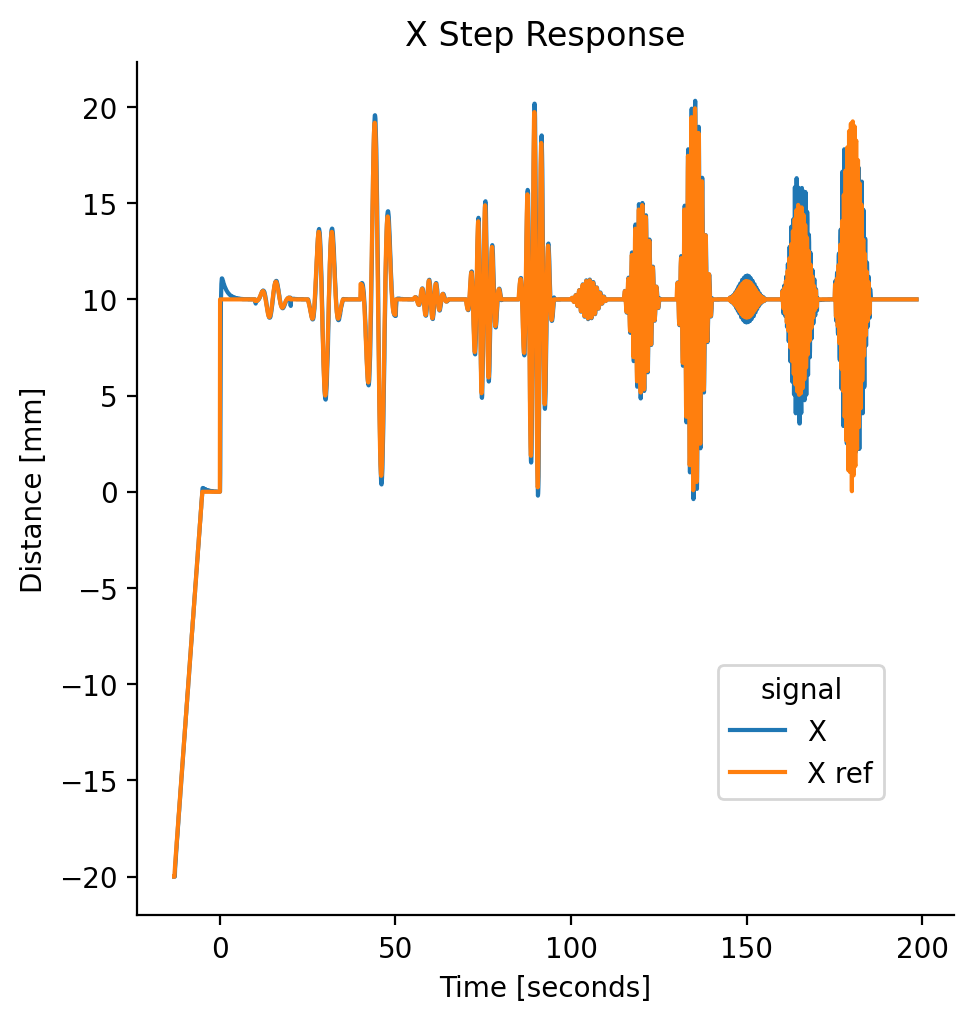

In [148]:
new_data1['Time'] = new_data1['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data1.loc[(new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')], kind="line", x='Time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('X Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.show()

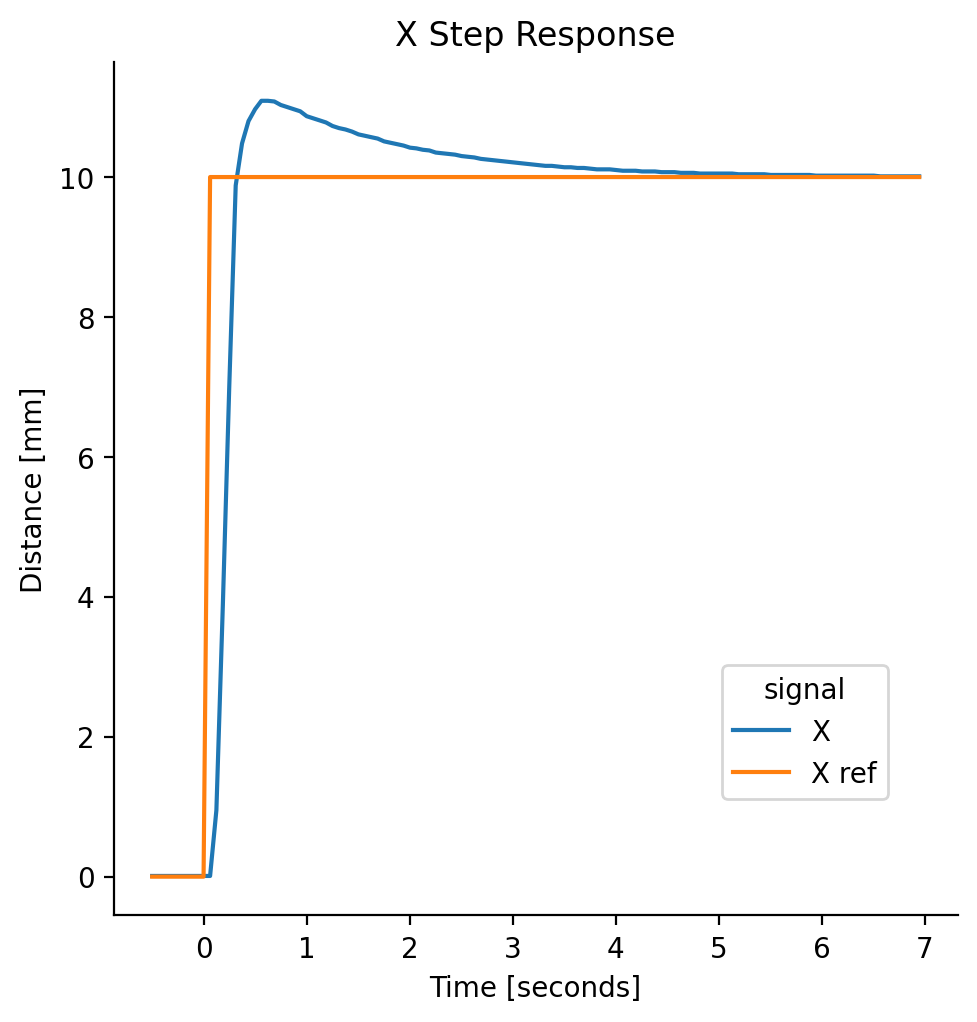

In [149]:
new_data1['step_shifted_time'] = new_data1['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
d = new_data1.loc[((new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')) & (new_data1['times'] > 12.5) & (new_data1['times'] < 20)]
p = sns.relplot(data=d, kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('X Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.savefig('x_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

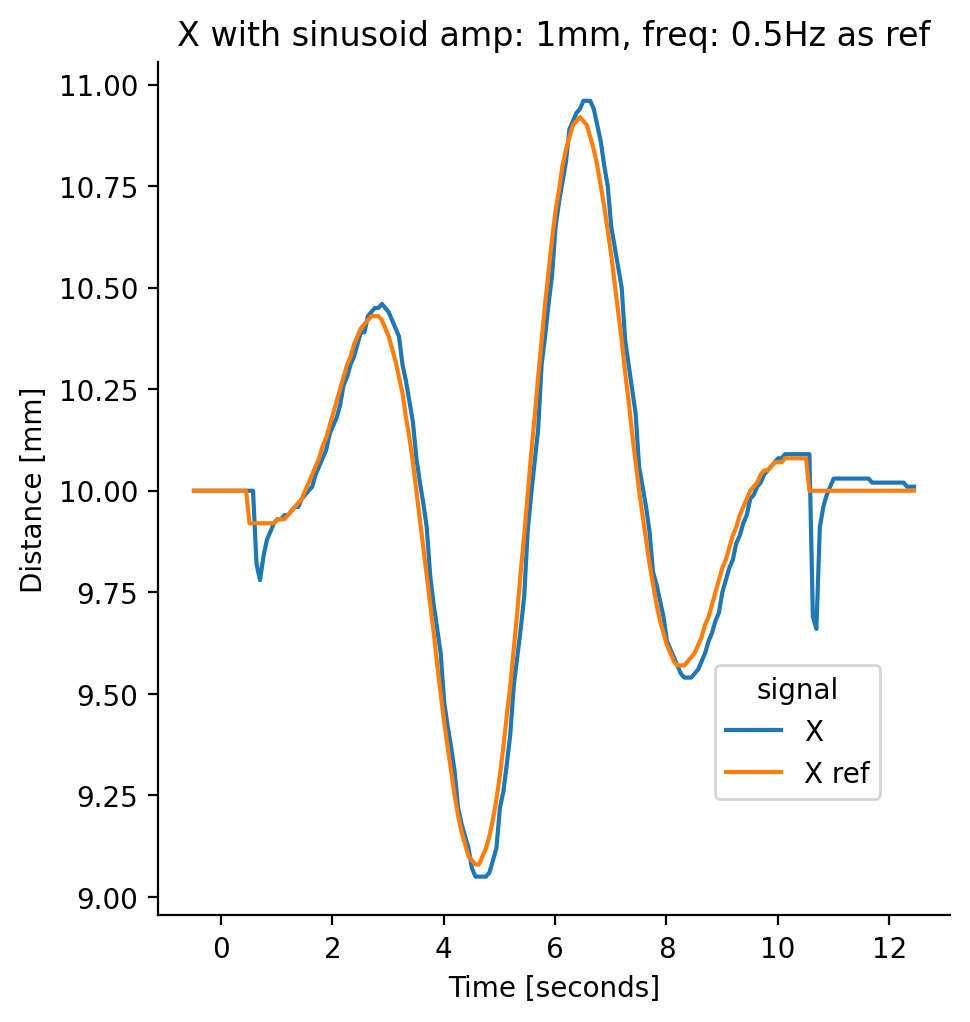

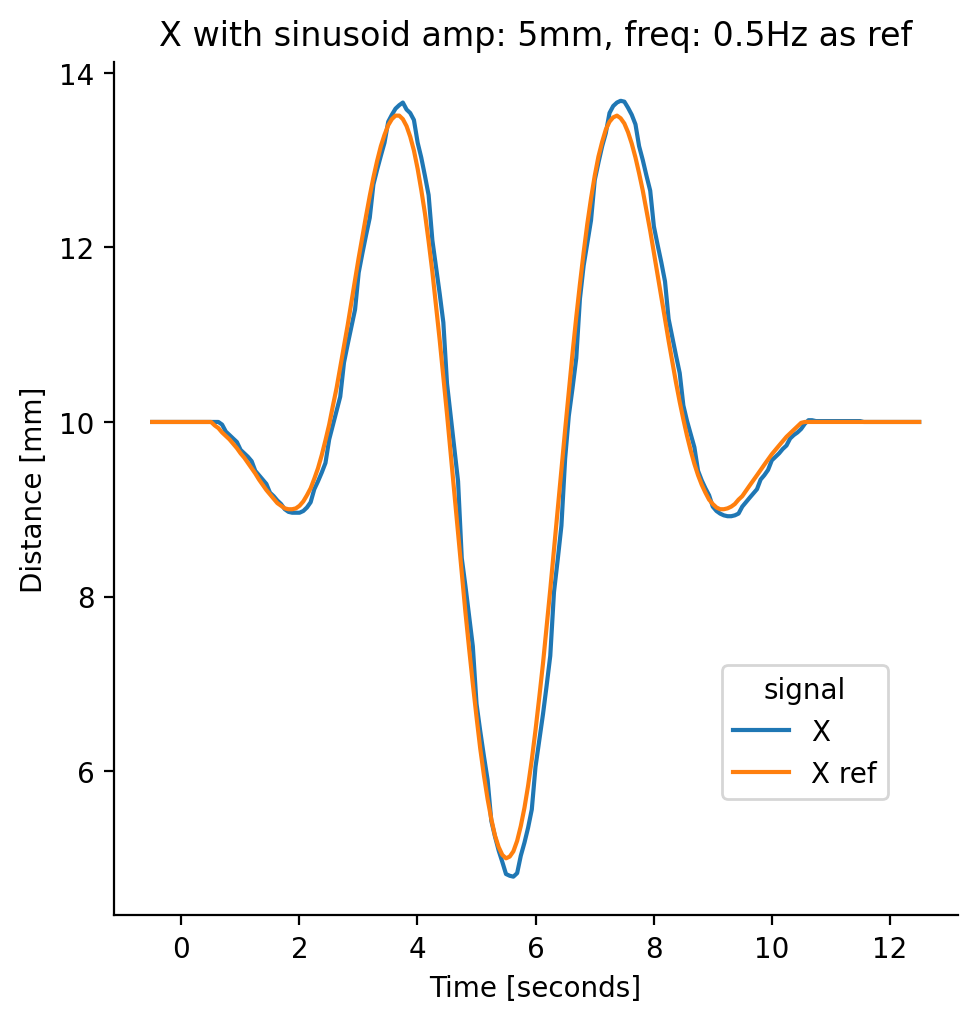

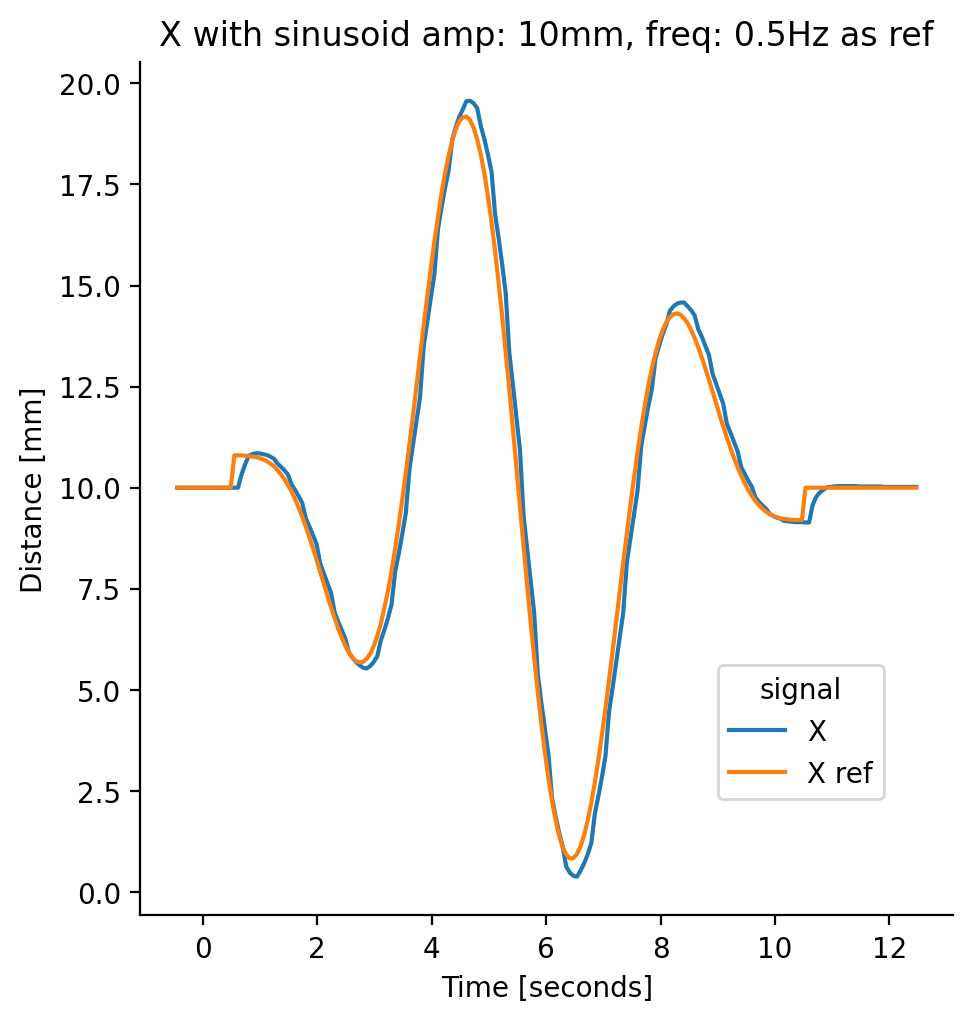

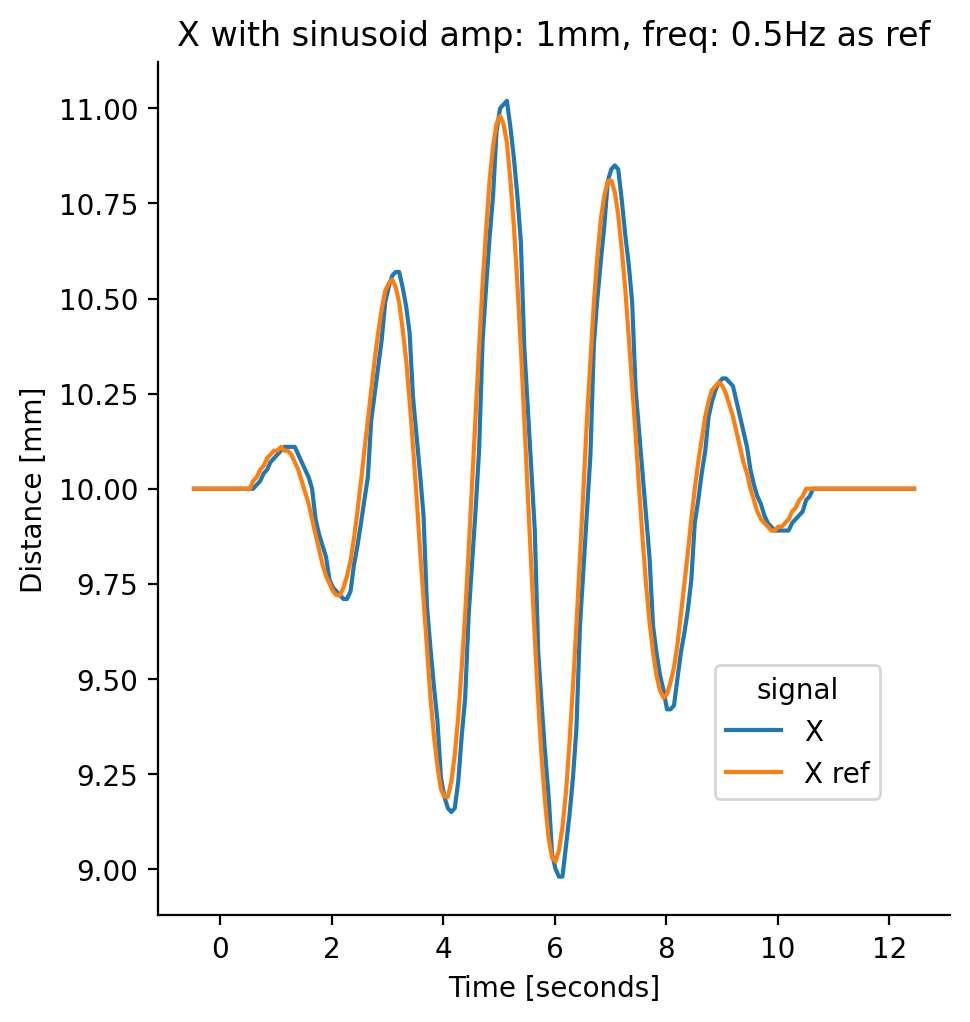

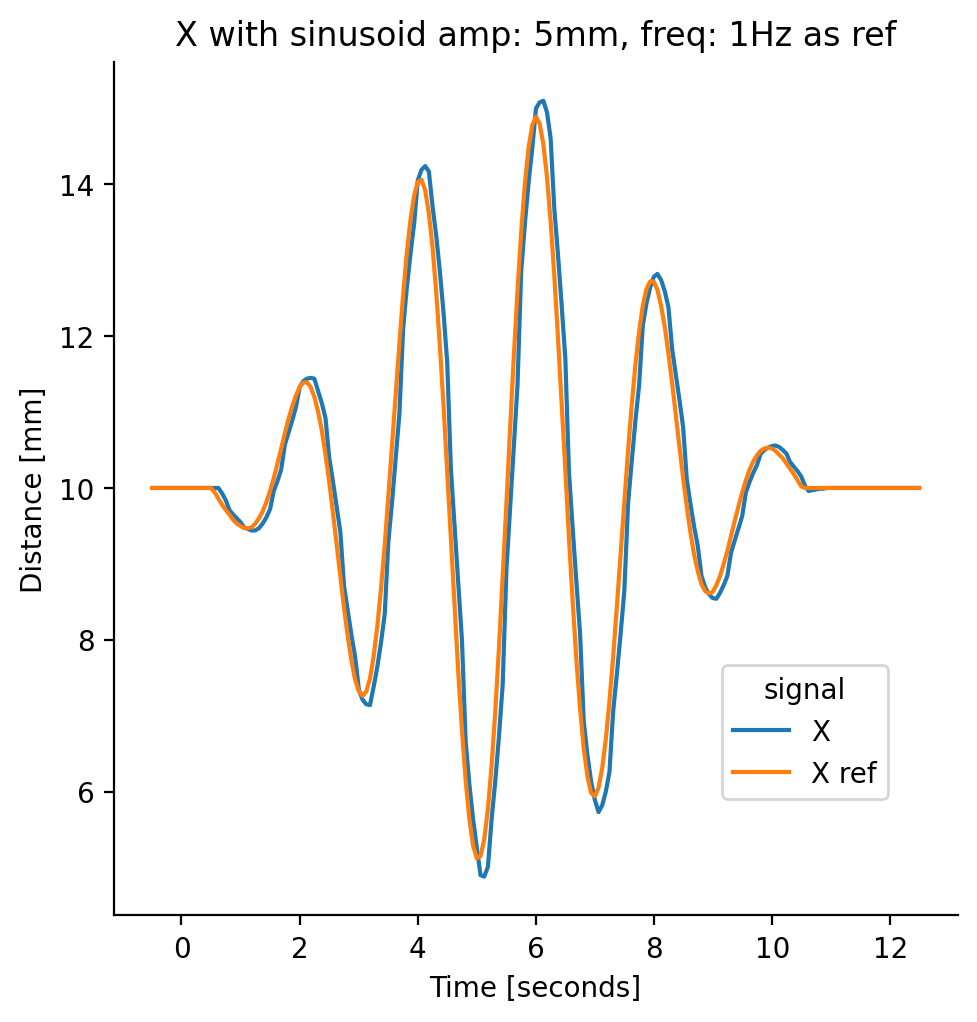

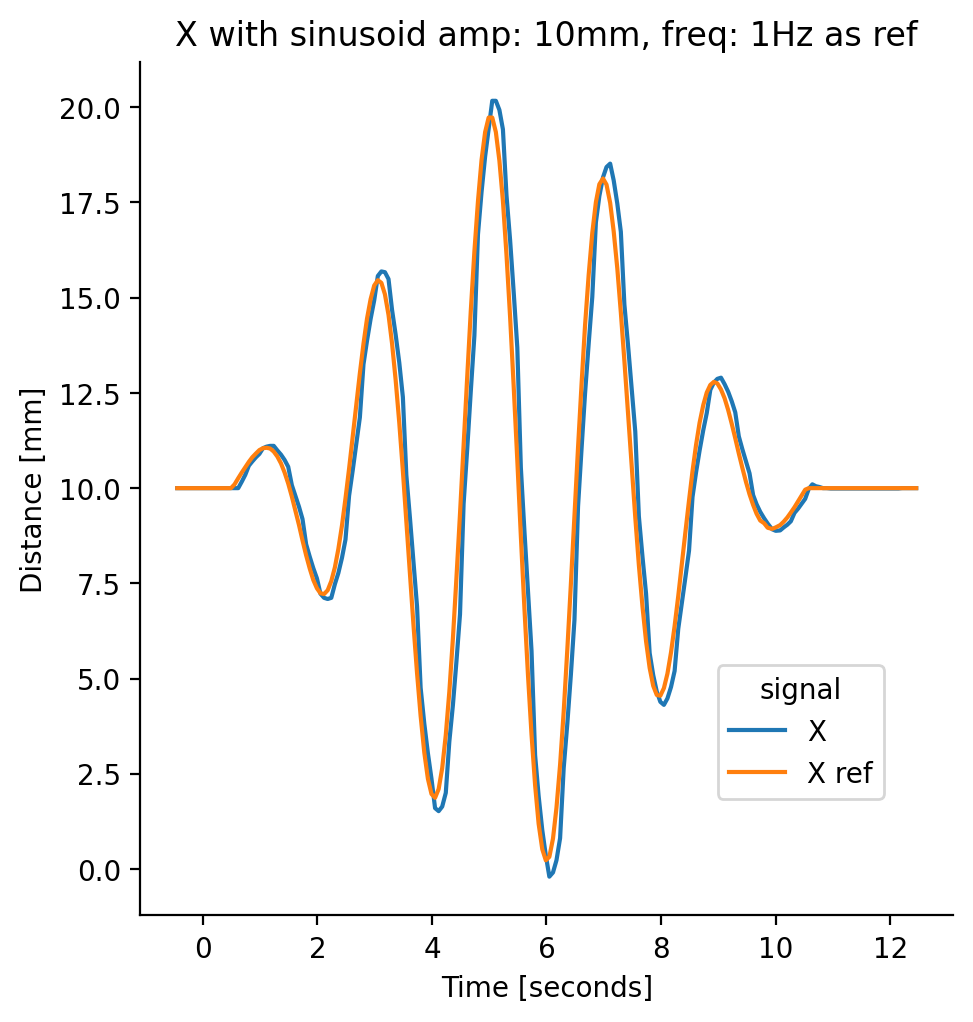

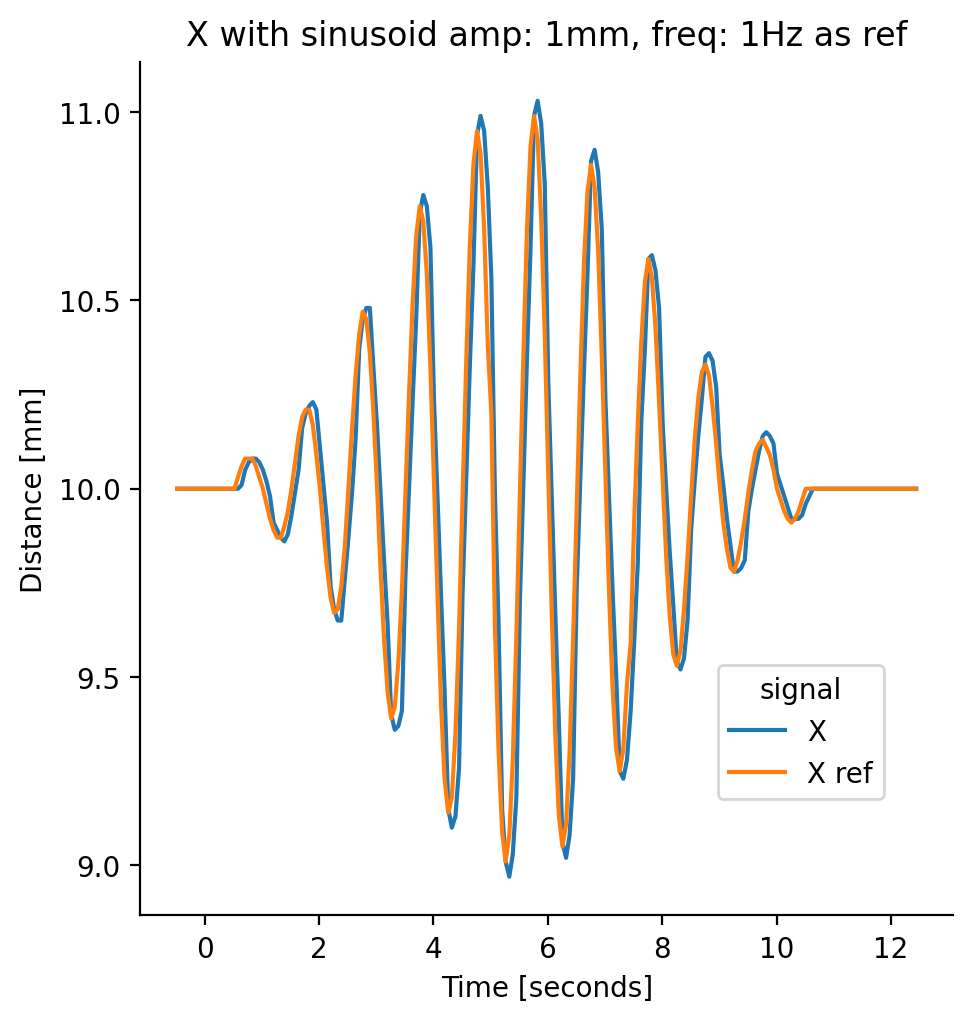

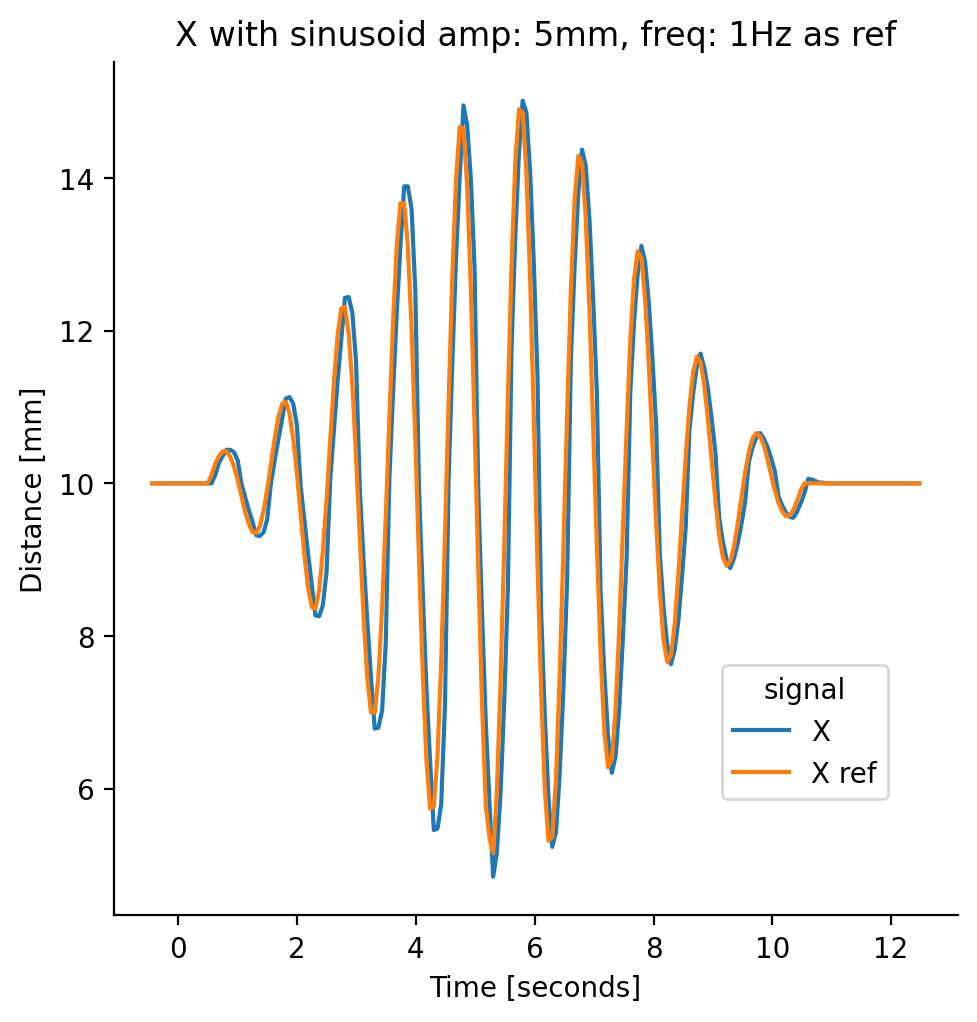

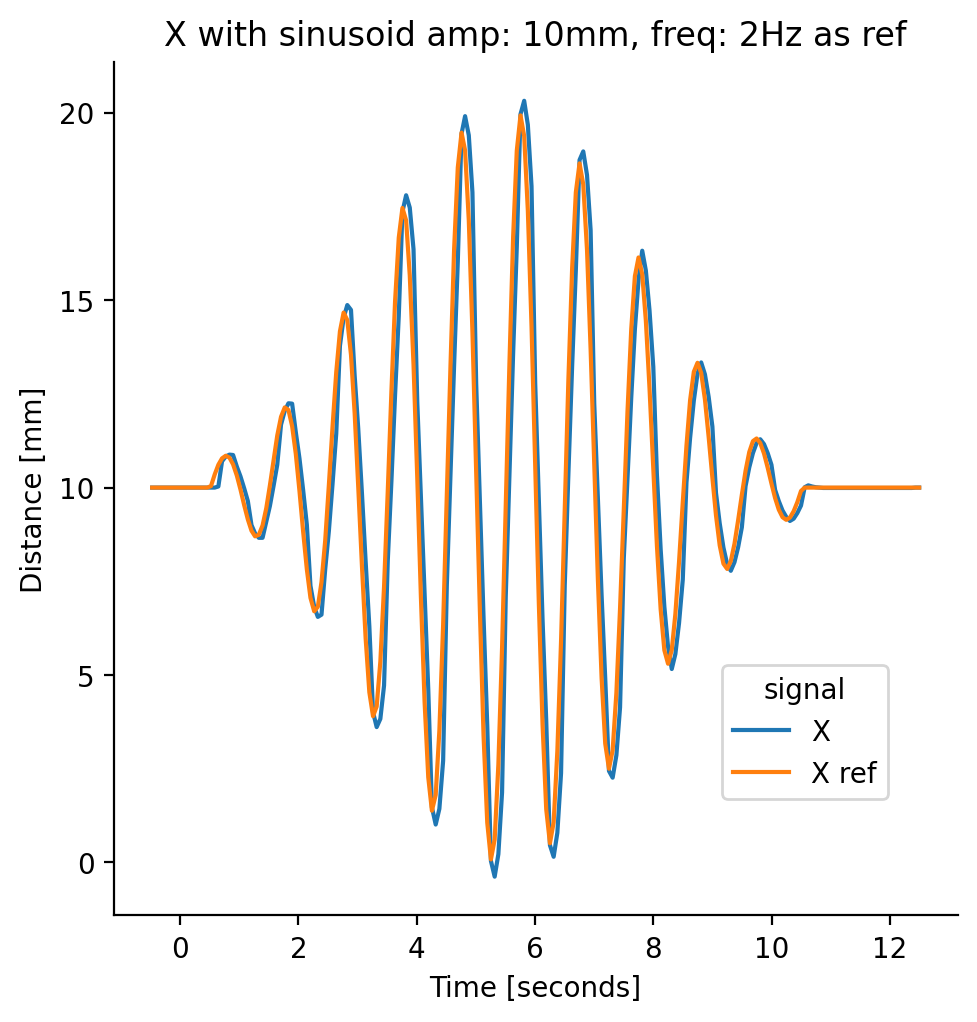

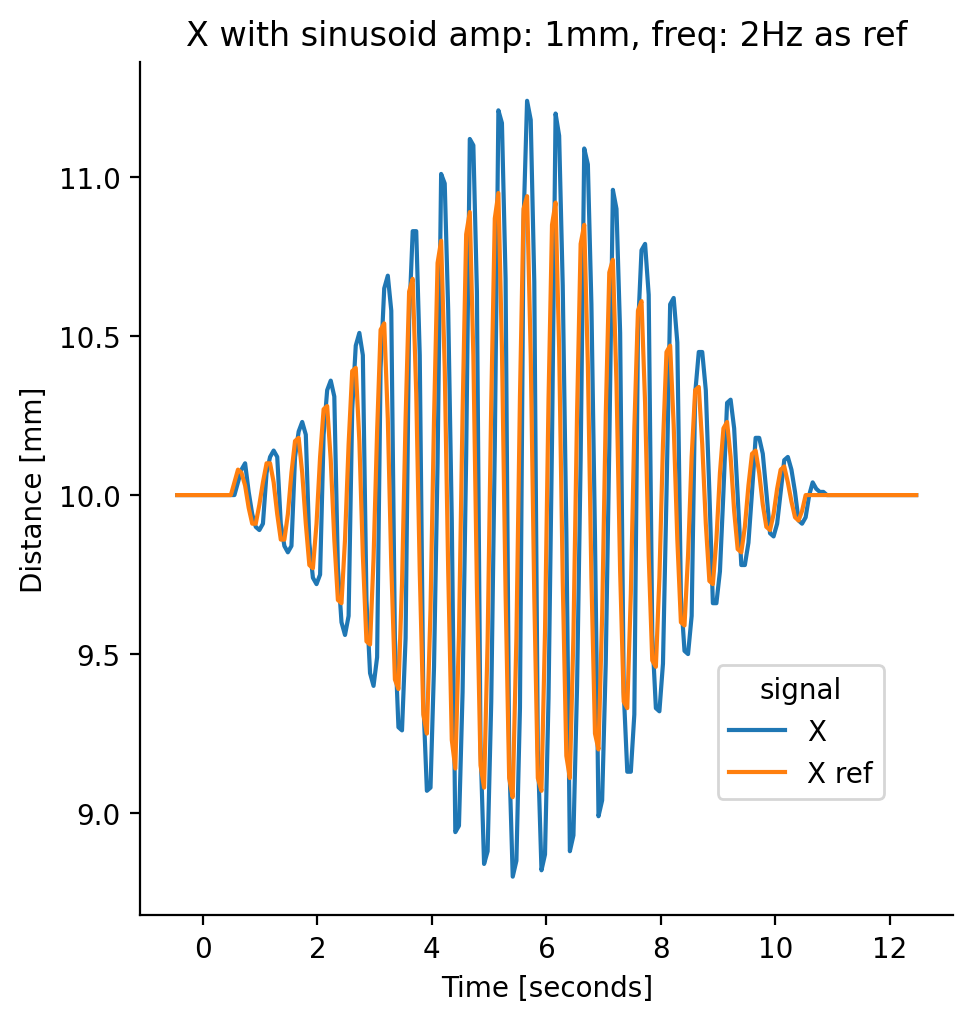

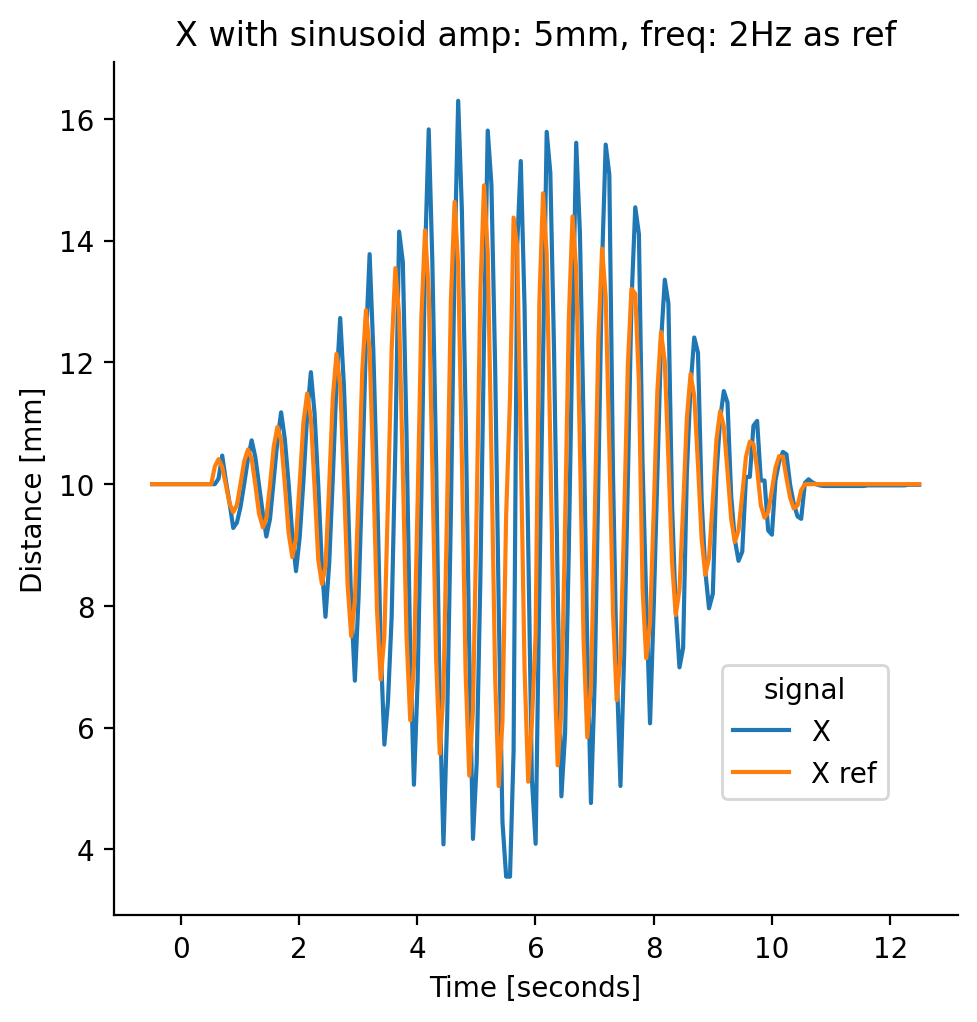

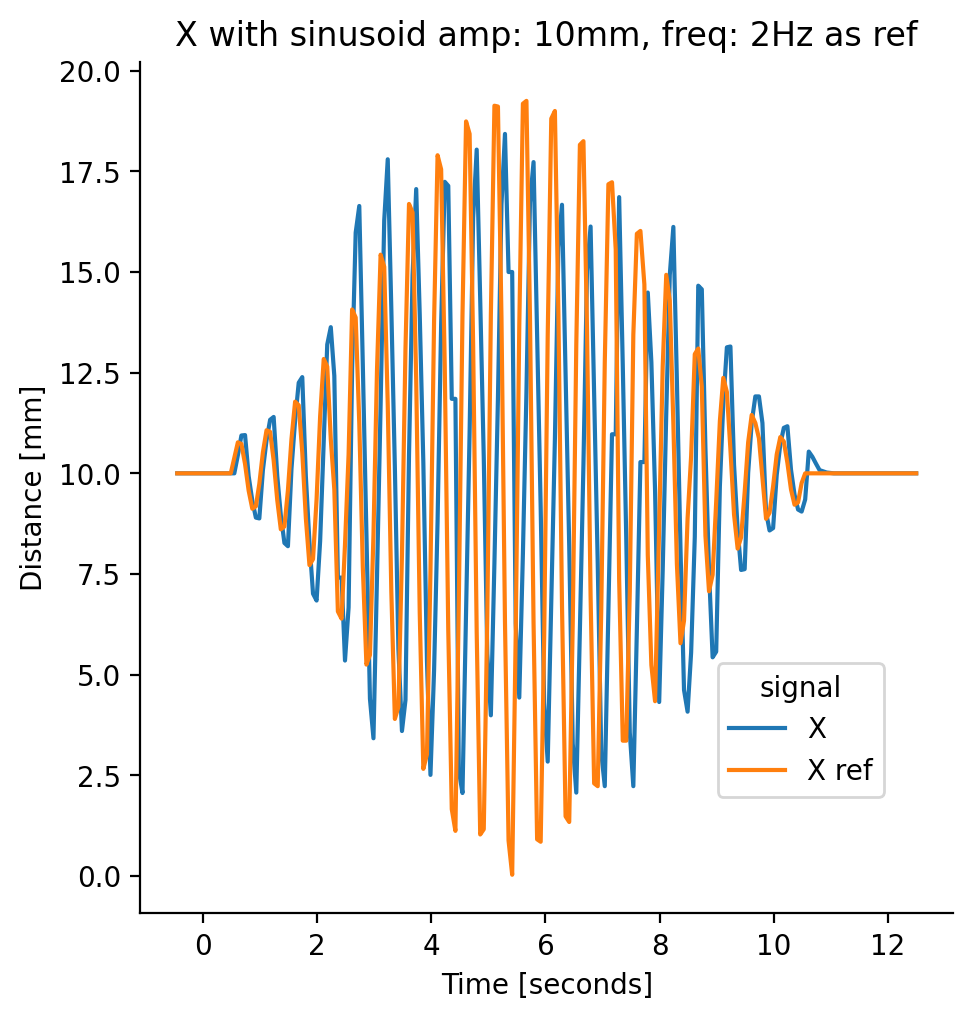

In [150]:
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data1['step_shifted_time'] = new_data1['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data1.loc[((new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')) & (new_data1['times'] > ti) & (new_data1['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

    amps = [1, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'X with sinusoid amp: {amps[i%3]}mm, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Distance [mm]')
    plt.savefig(f'x_sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

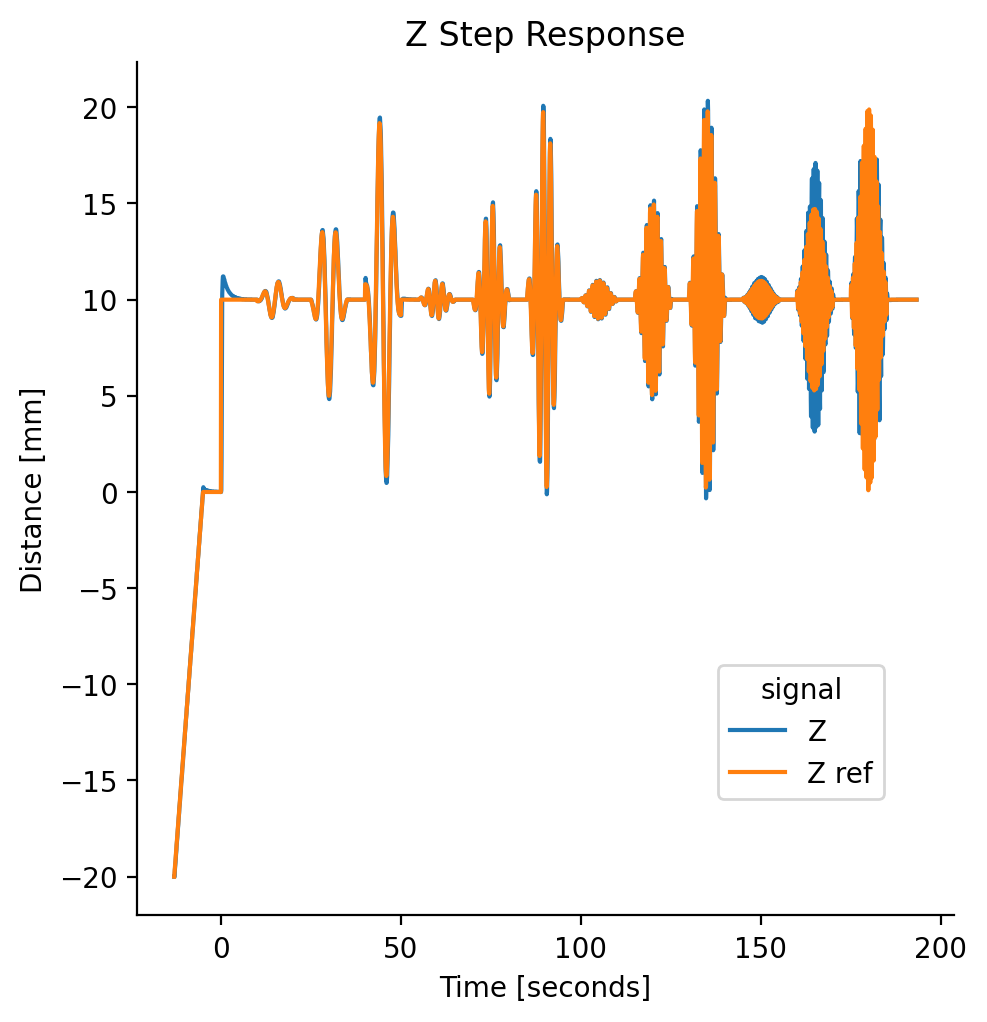

In [151]:
new_data2['step_shifted_time'] = new_data2['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data2.loc[(new_data2['signal'] == 'Z') | (new_data2['signal'] == 'Z ref')], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Z Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.show()

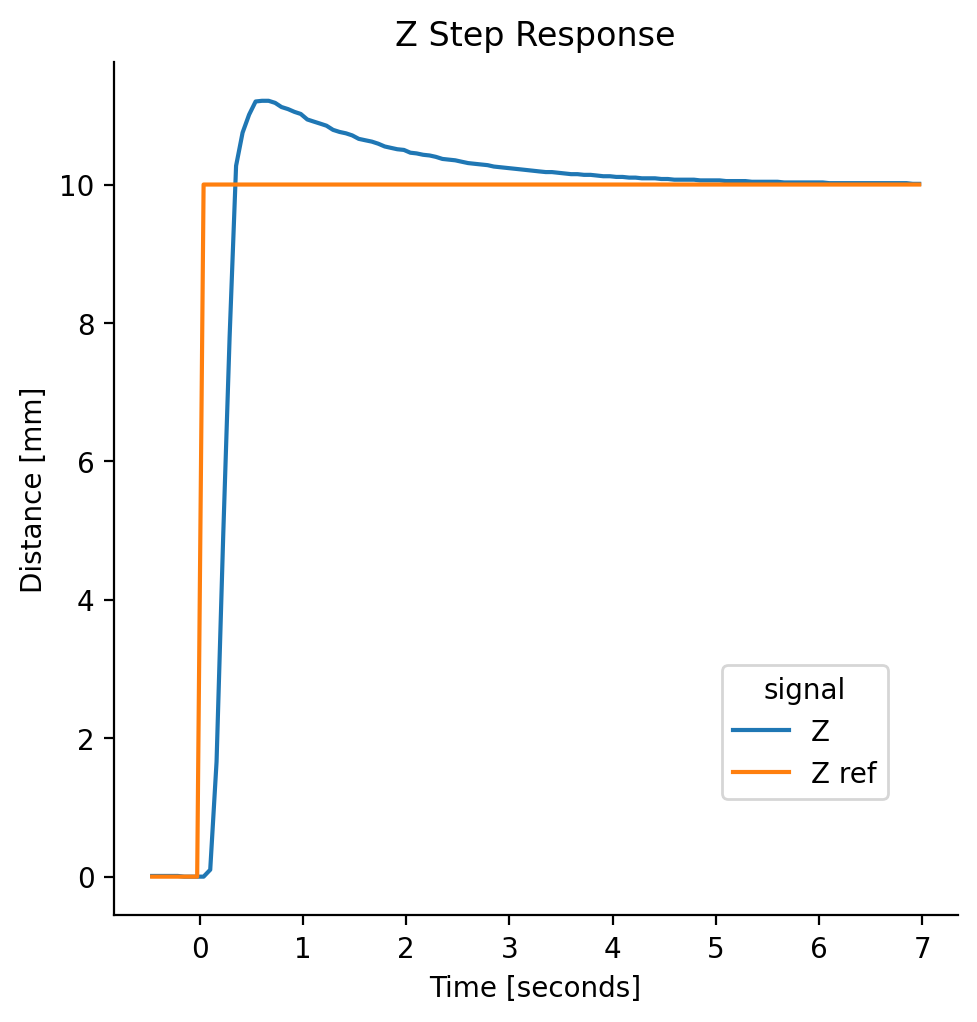

In [152]:
new_data2['step_shifted_time'] = new_data2['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data2.loc[((new_data2['signal'] == 'Z') | (new_data2['signal'] == 'Z ref')) & (new_data2['times'] > 12.5) & (new_data2['times'] < 20)], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Z Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.savefig('z_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

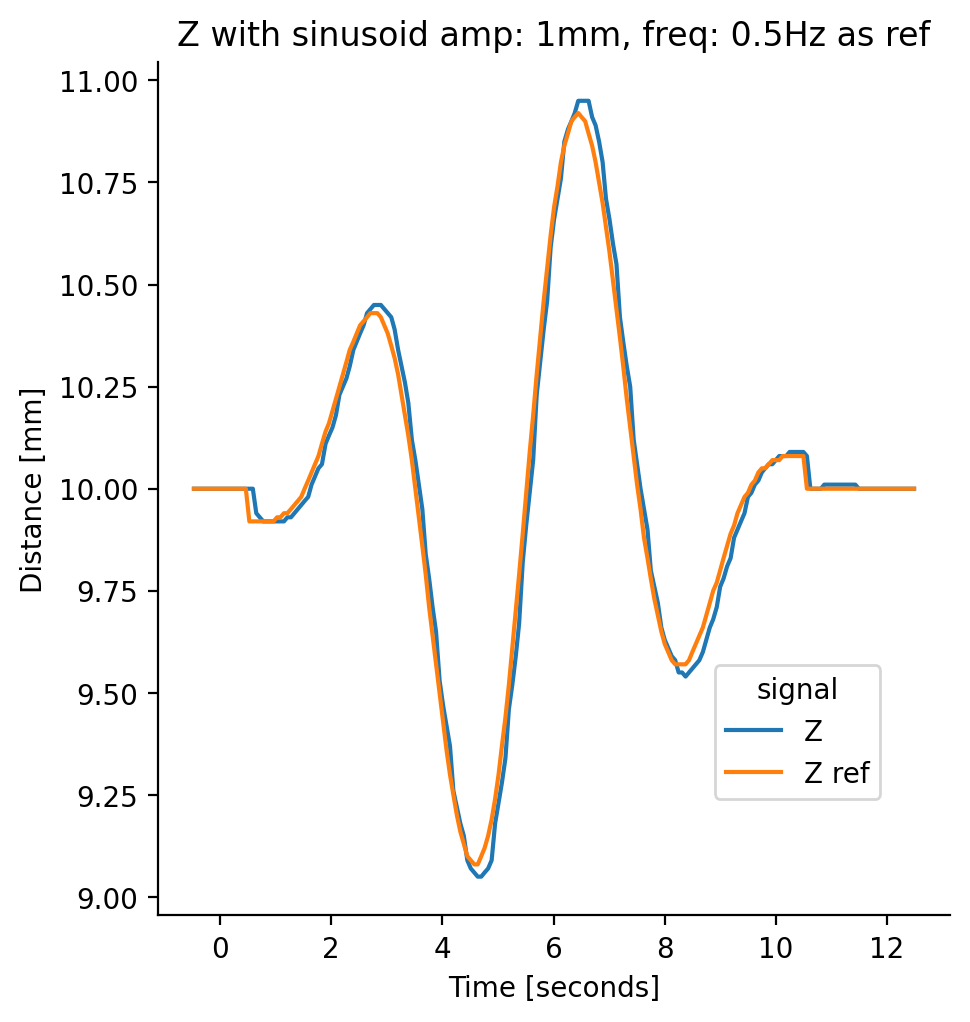

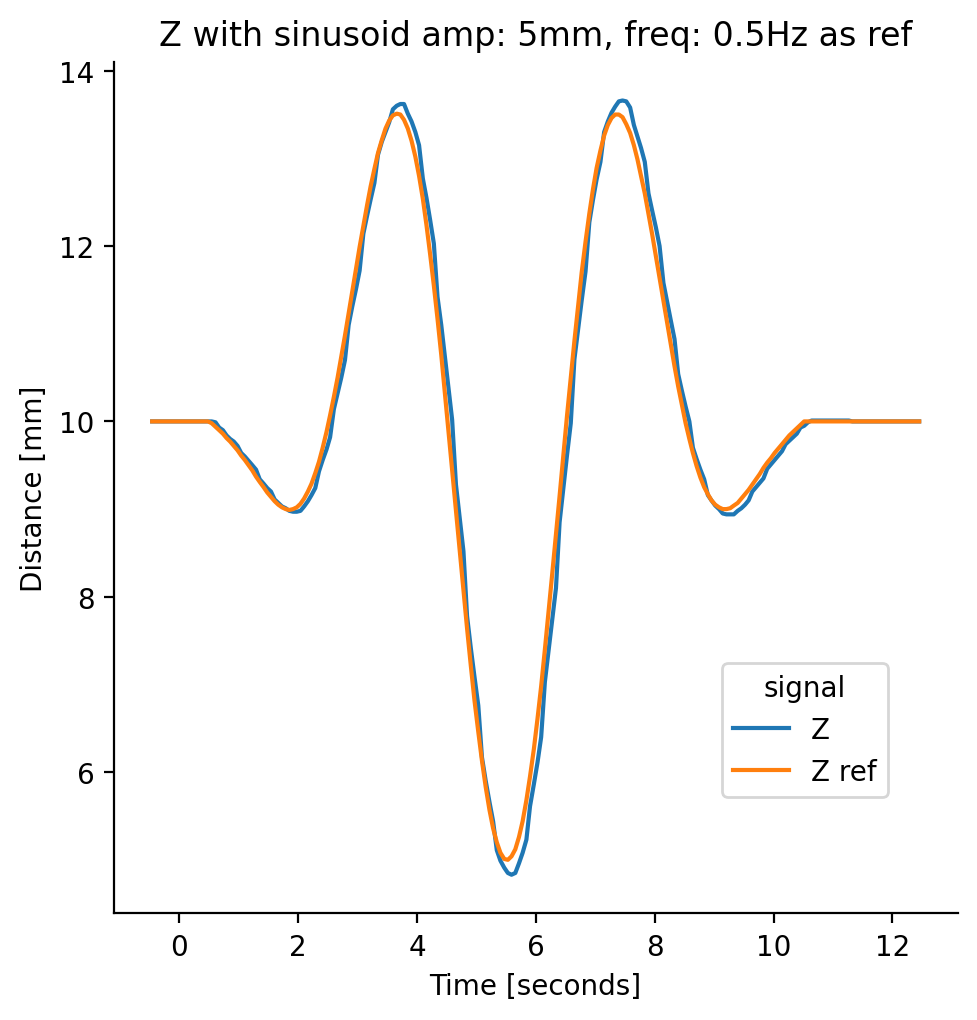

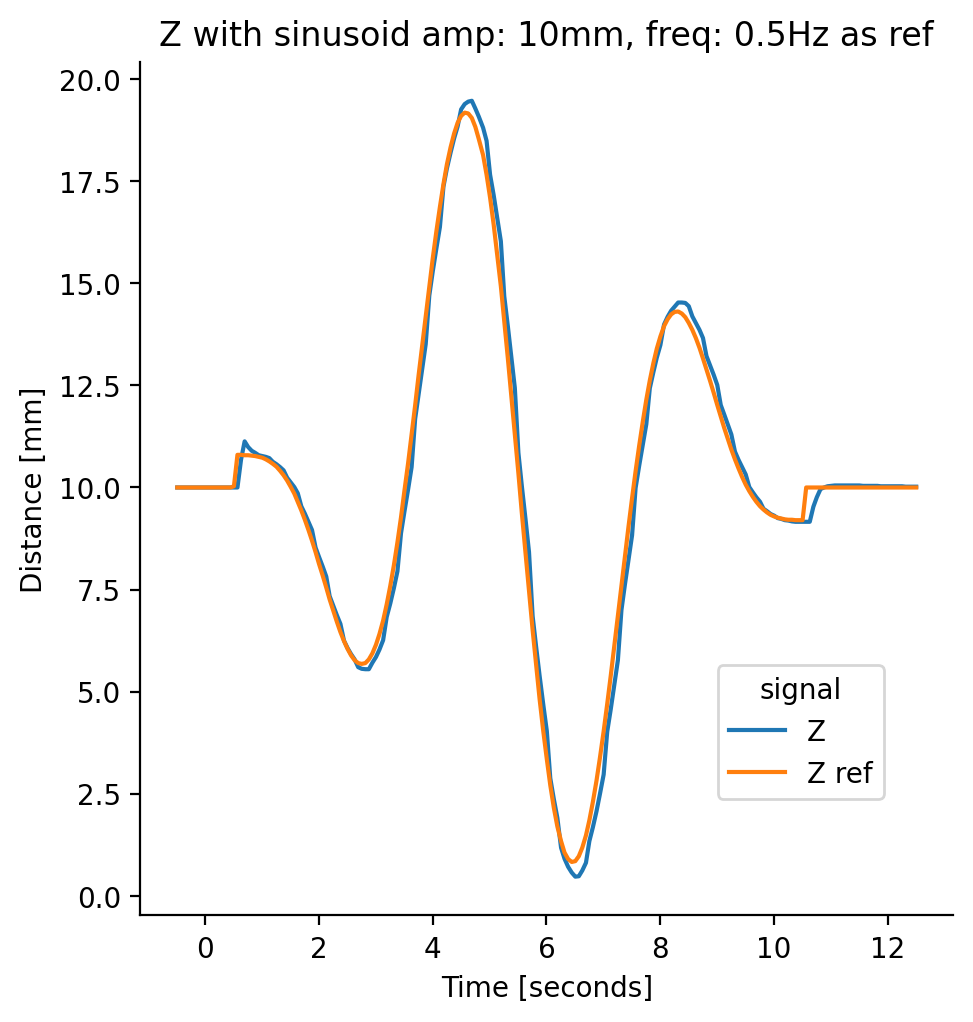

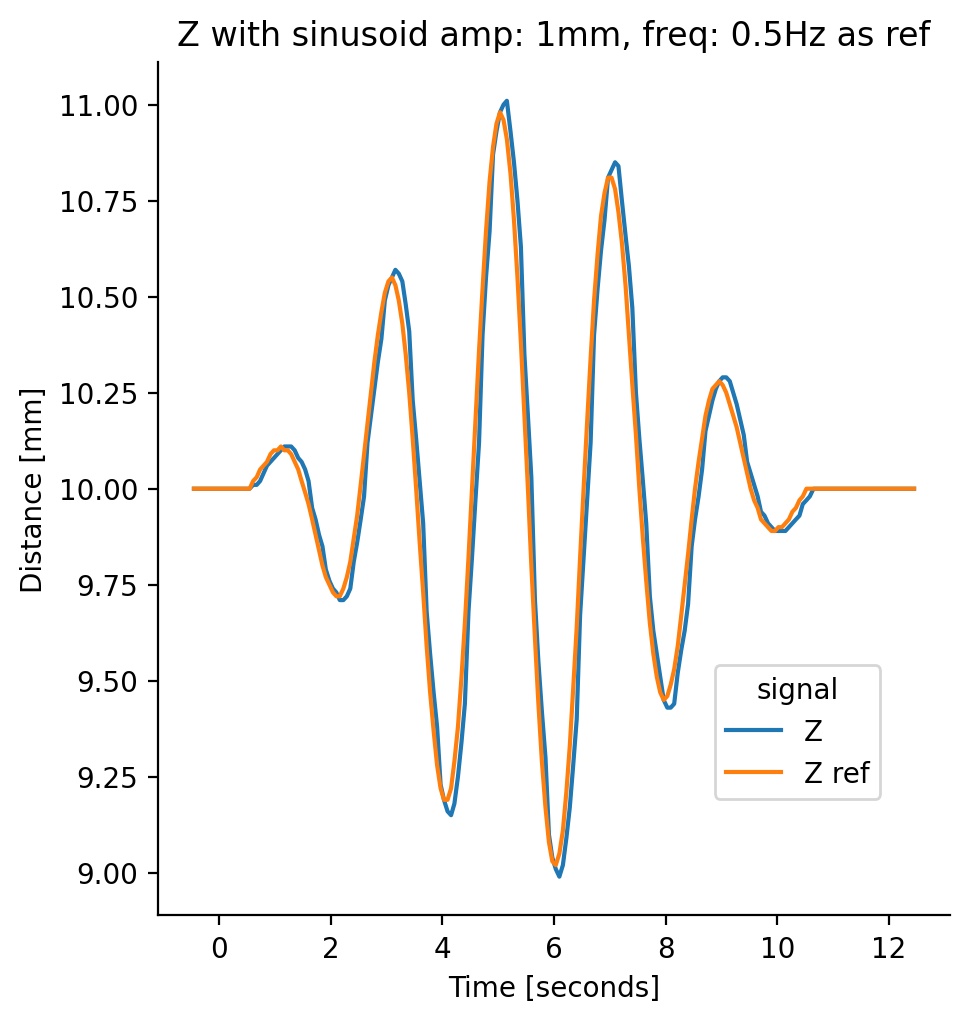

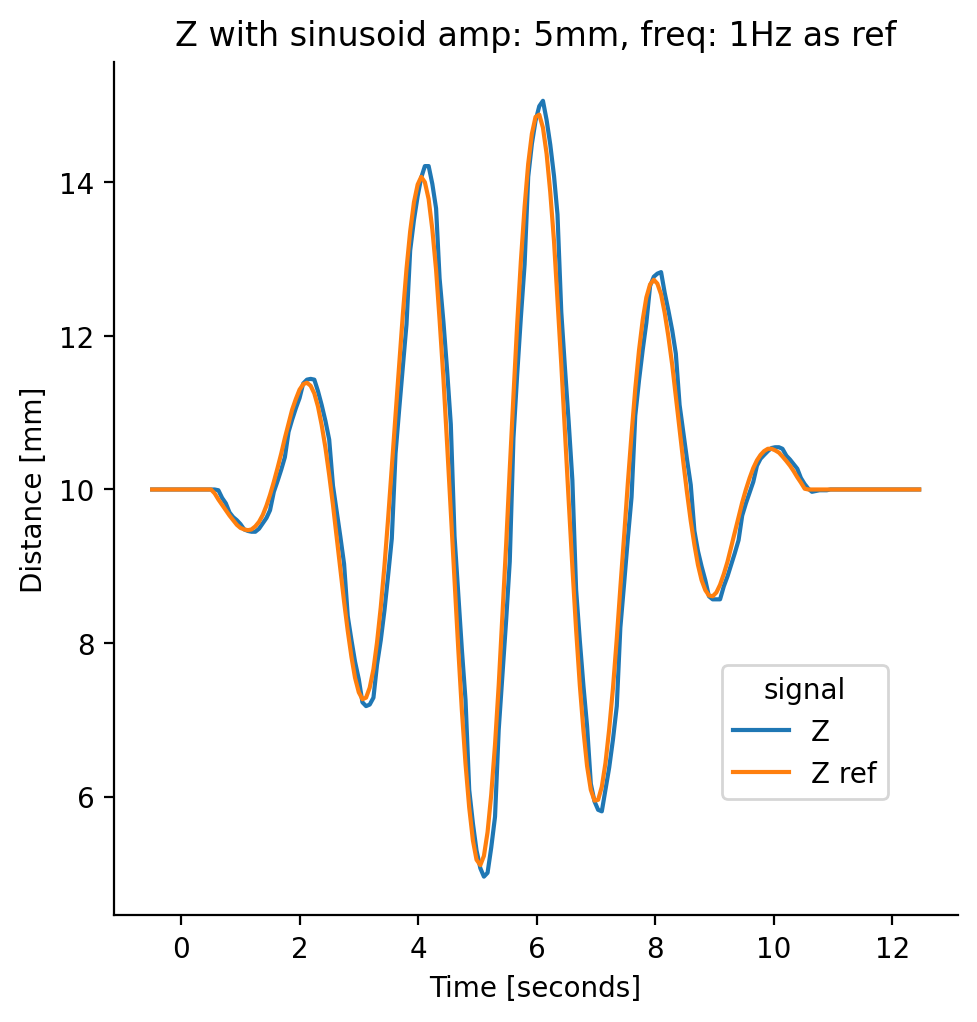

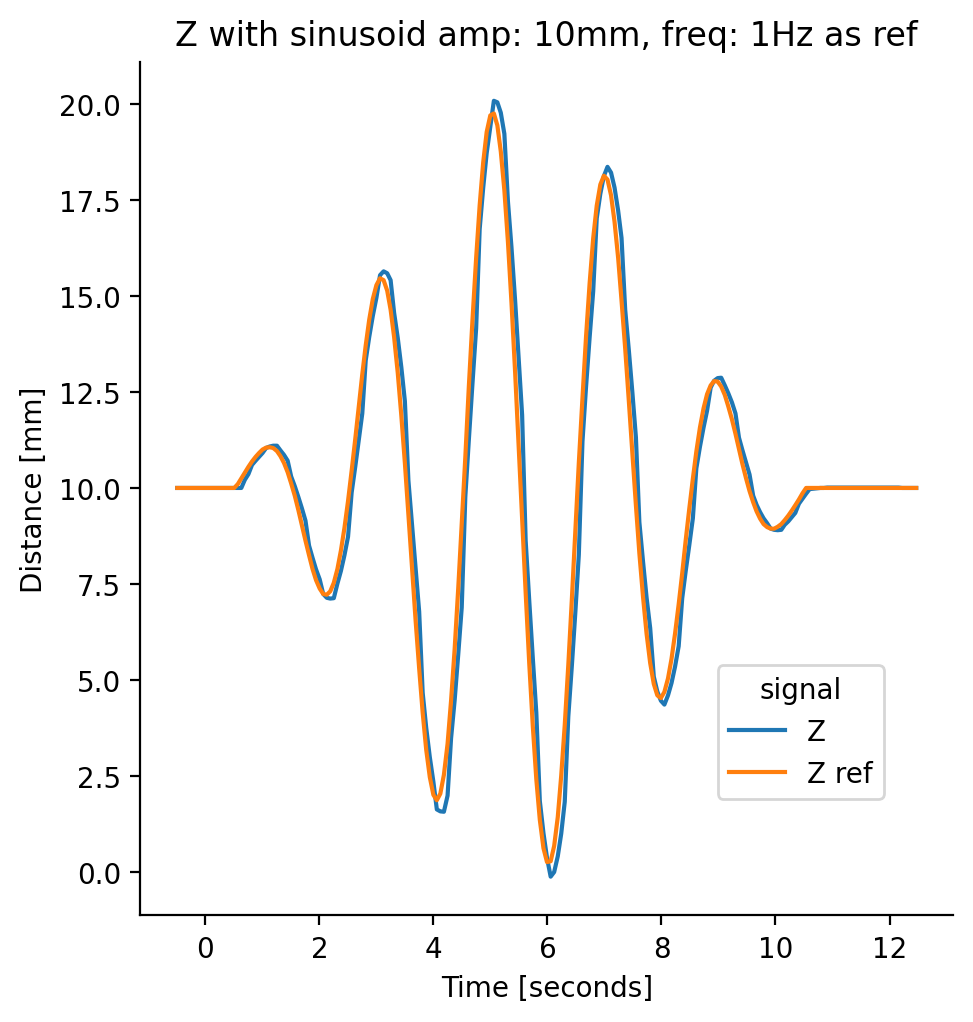

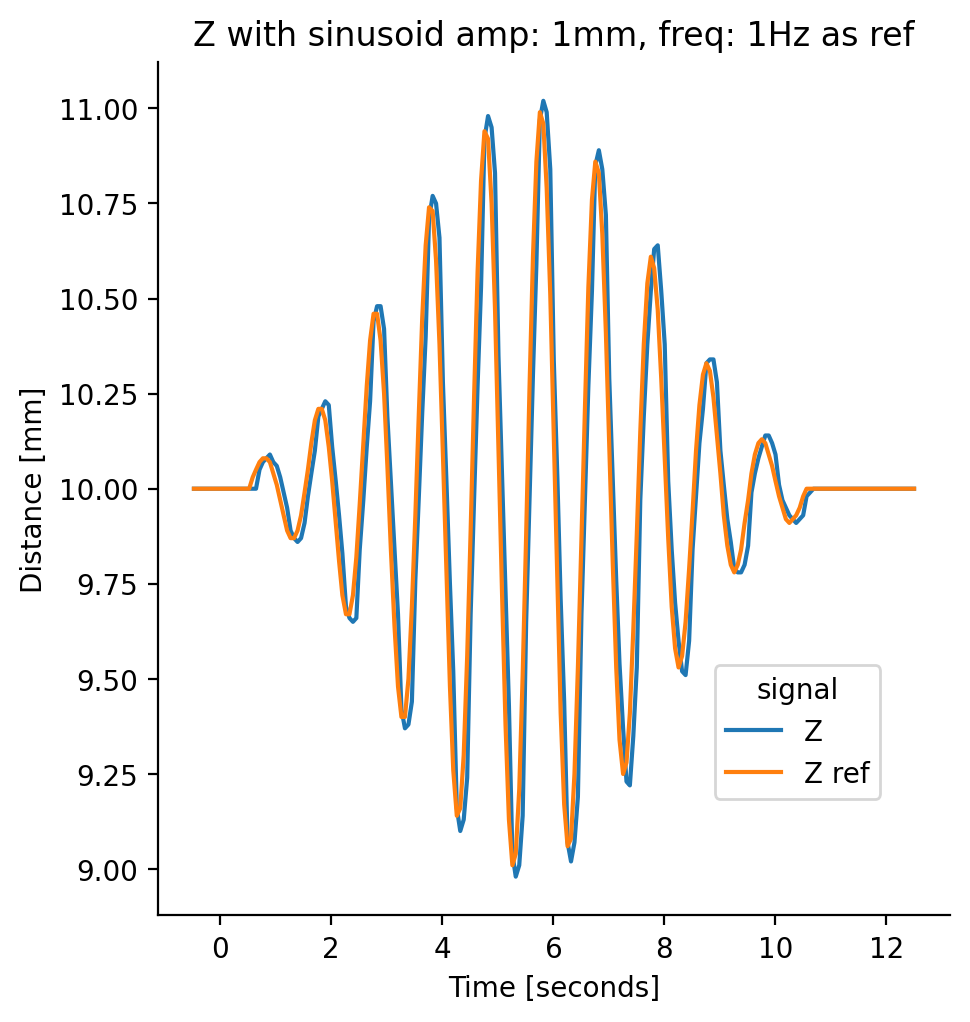

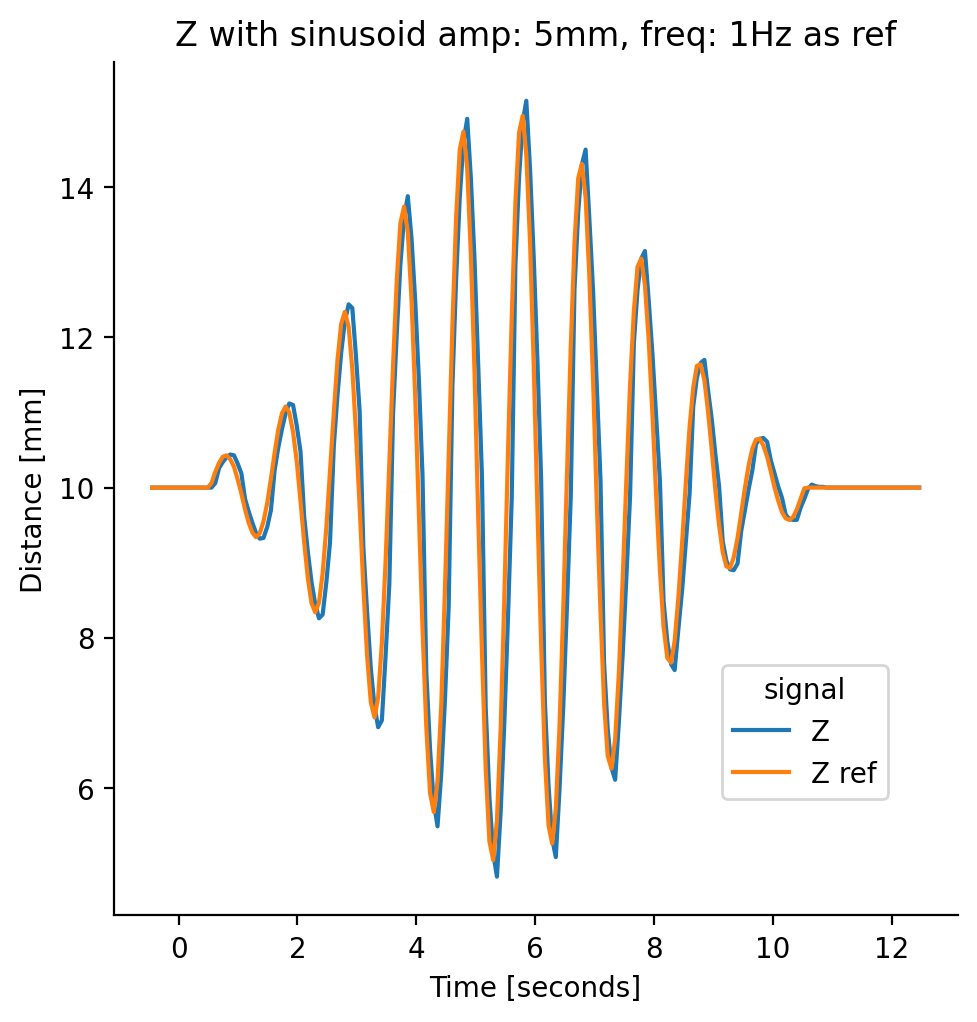

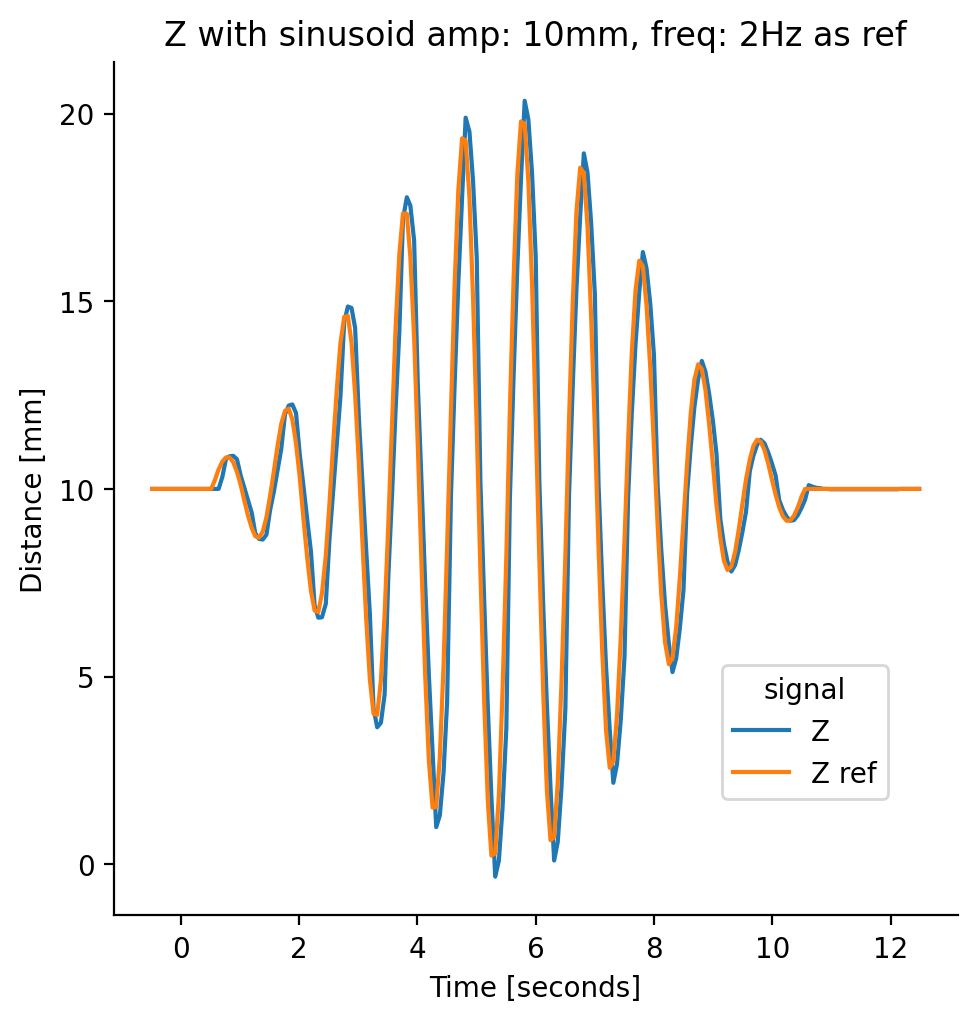

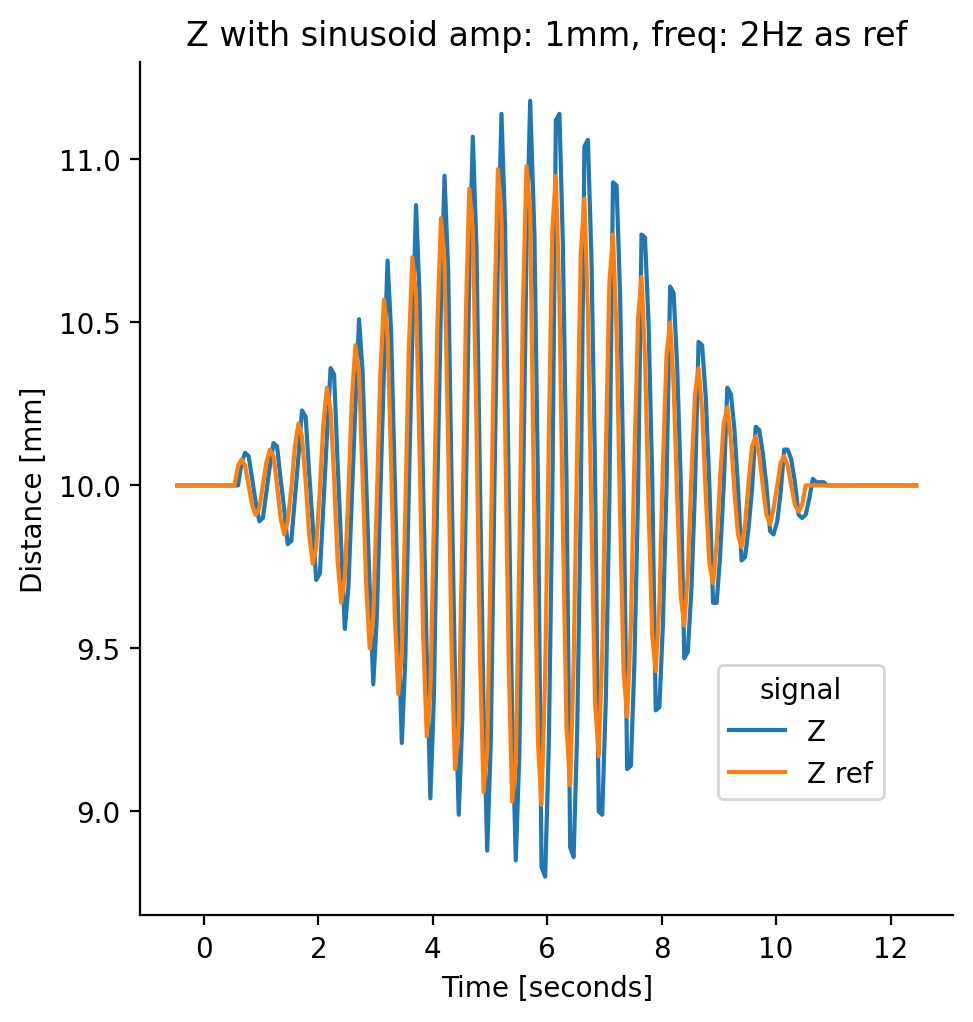

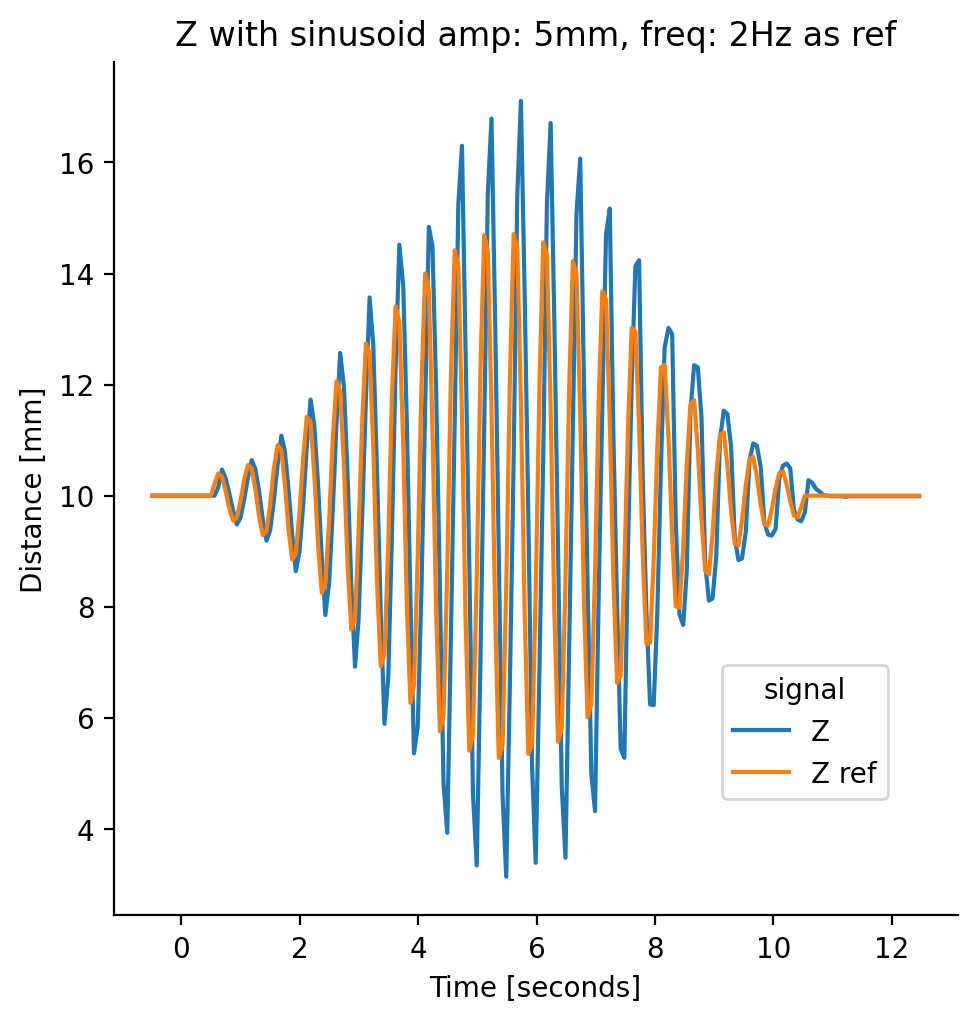

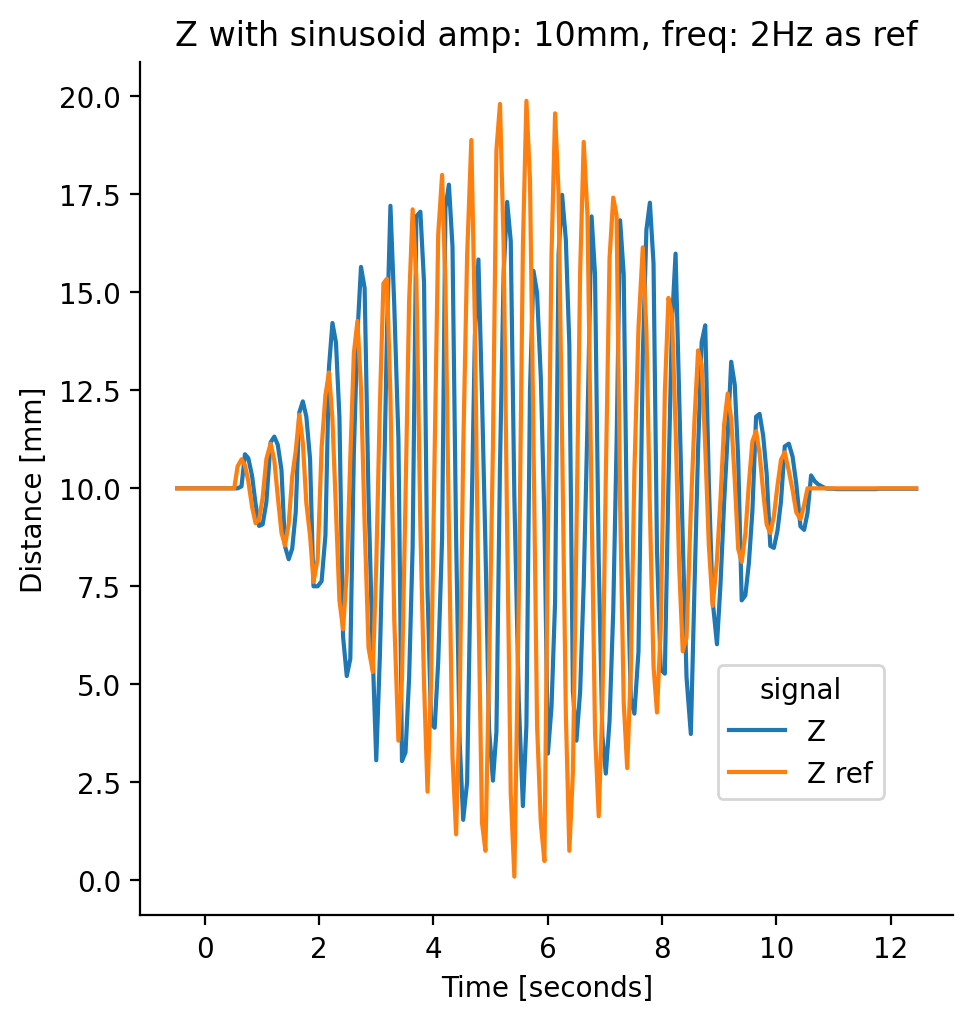

In [153]:
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data2['step_shifted_time'] = new_data2['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data2.loc[((new_data2['signal'] == 'Z') | (new_data2['signal'] == 'Z ref')) & (new_data2['times'] > ti) & (new_data2['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)
    
    amps = [1, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'Z with sinusoid amp: {amps[i%3]}mm, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Distance [mm]')
    plt.savefig(f'z_sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

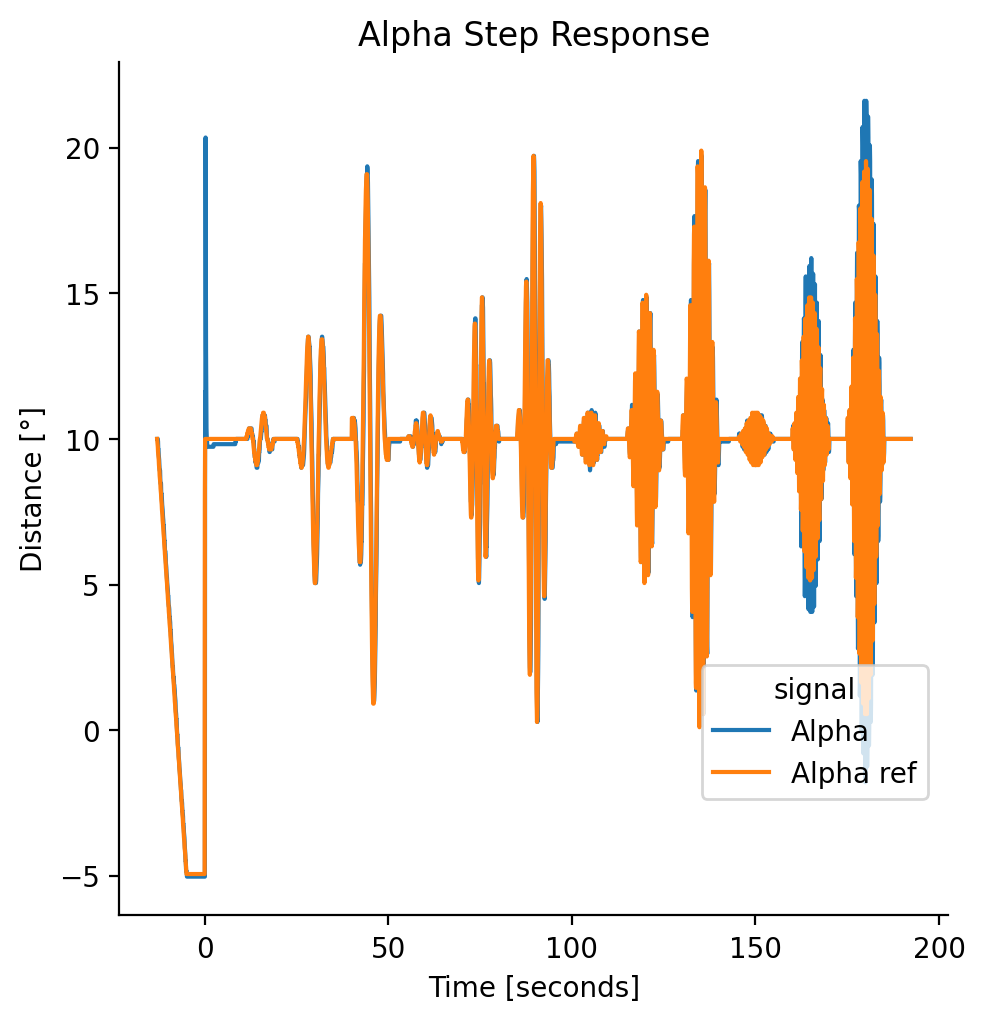

In [154]:
new_data3['step_shifted_time'] = new_data3['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data3.loc[(new_data3['signal'] == 'Alpha') | (new_data3['signal'] == 'Alpha ref')], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Alpha Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [°]')
plt.show()

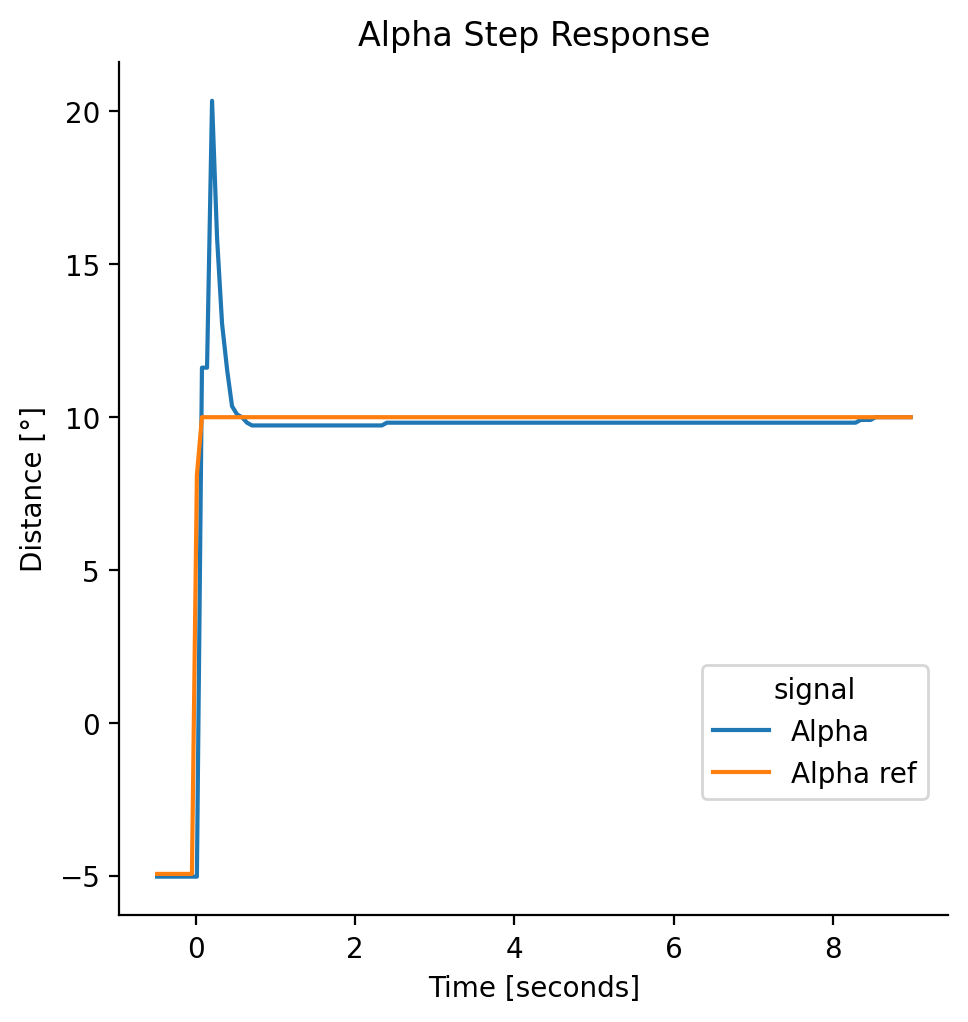

In [155]:
new_data2['step_shifted_time'] = new_data2['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data3.loc[((new_data3['signal'] == 'Alpha') | (new_data3['signal'] == 'Alpha ref')) & (new_data3['times'] > 12.5) & (new_data3['times'] < 22)], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Alpha Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [°]')
plt.savefig('alpha_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

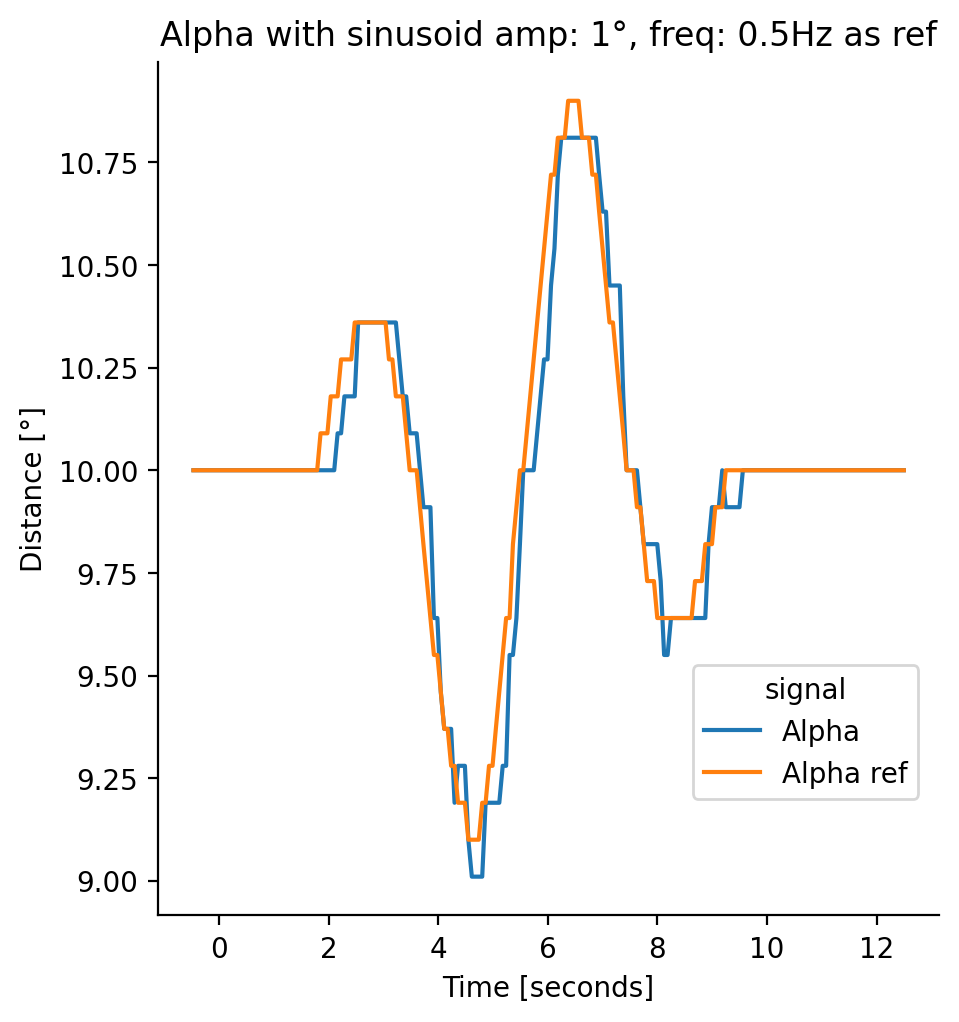

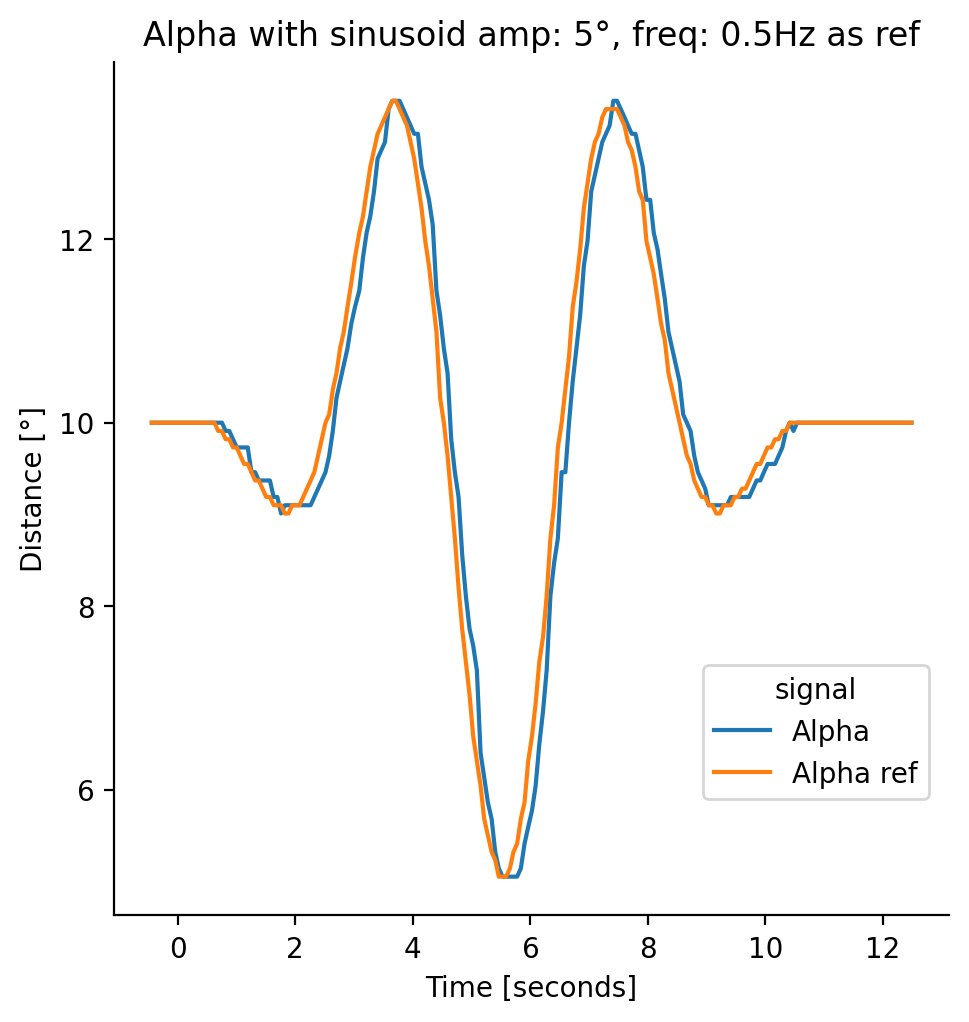

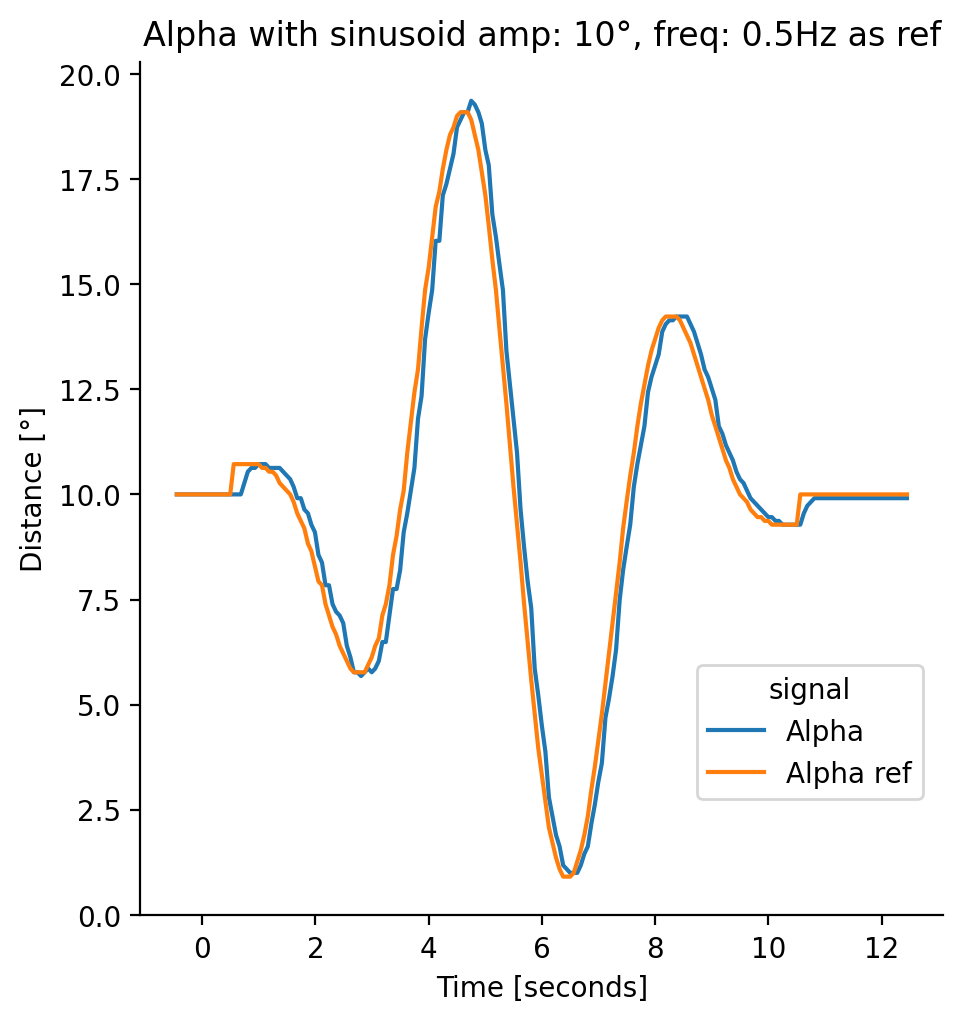

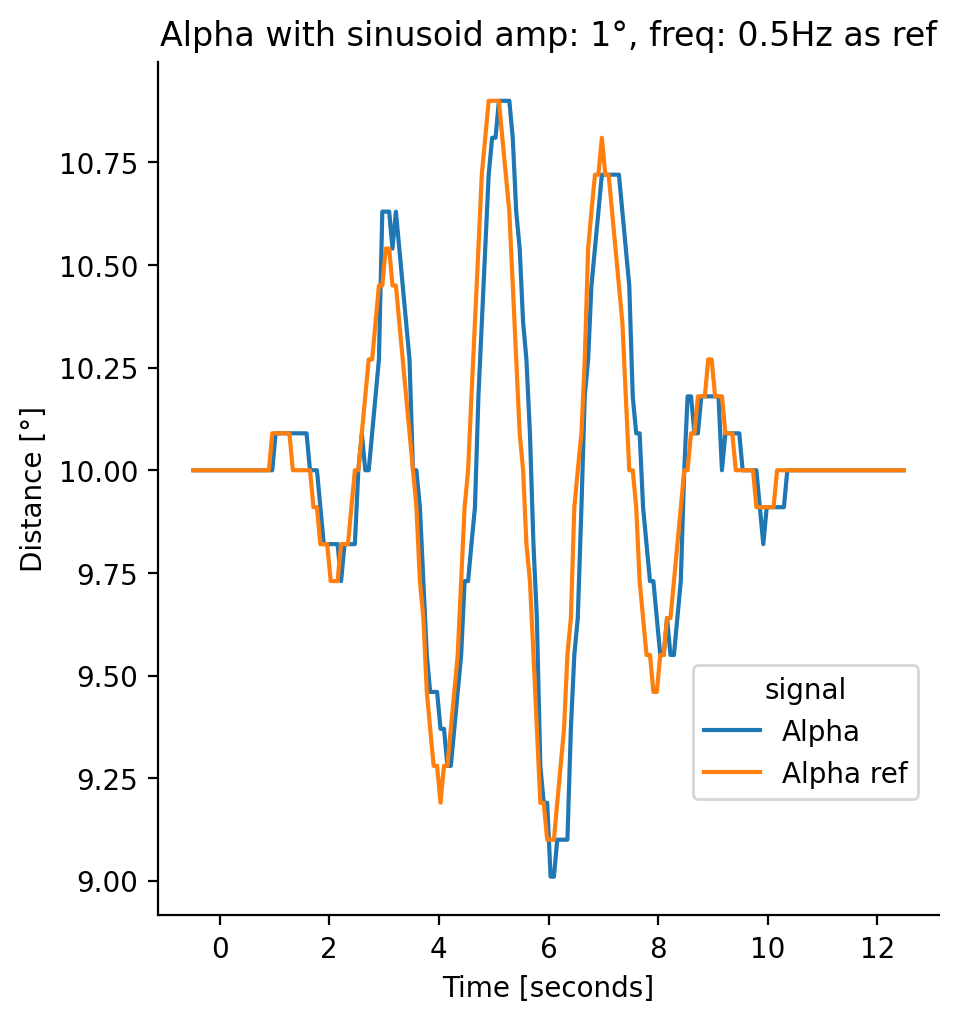

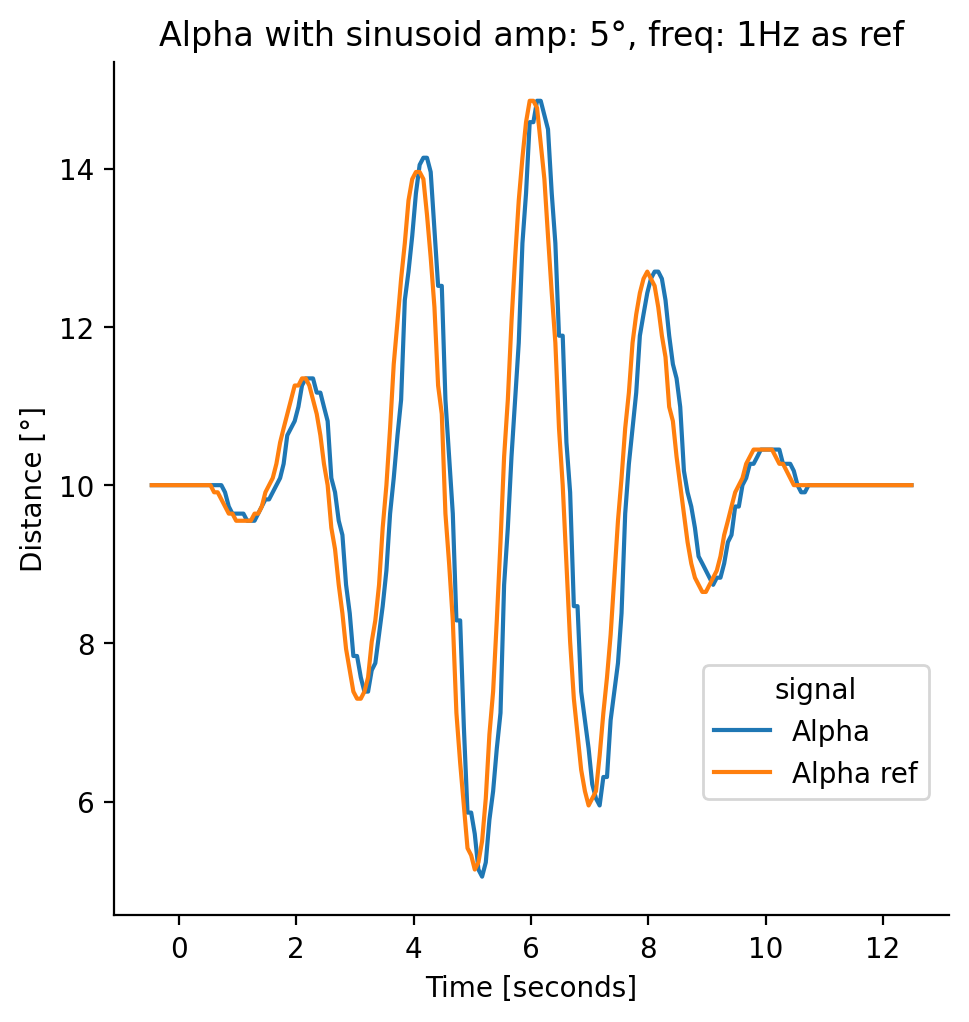

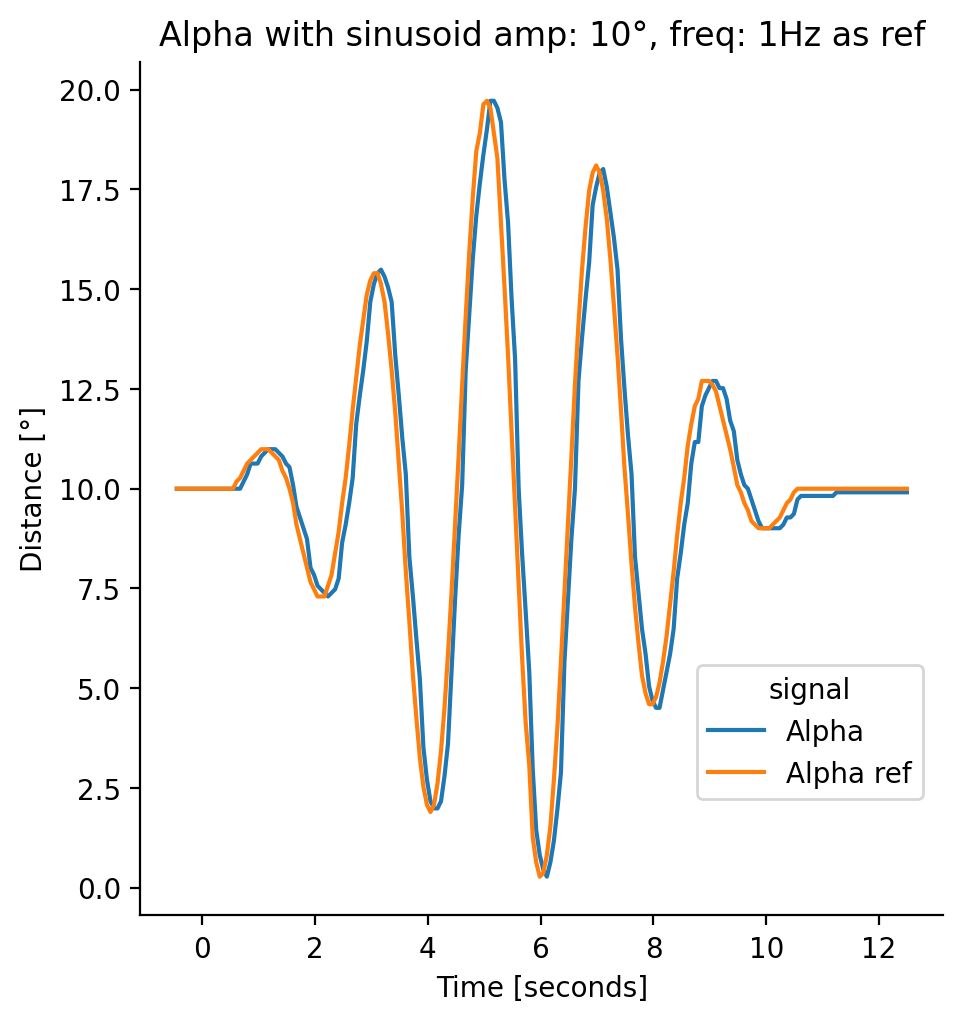

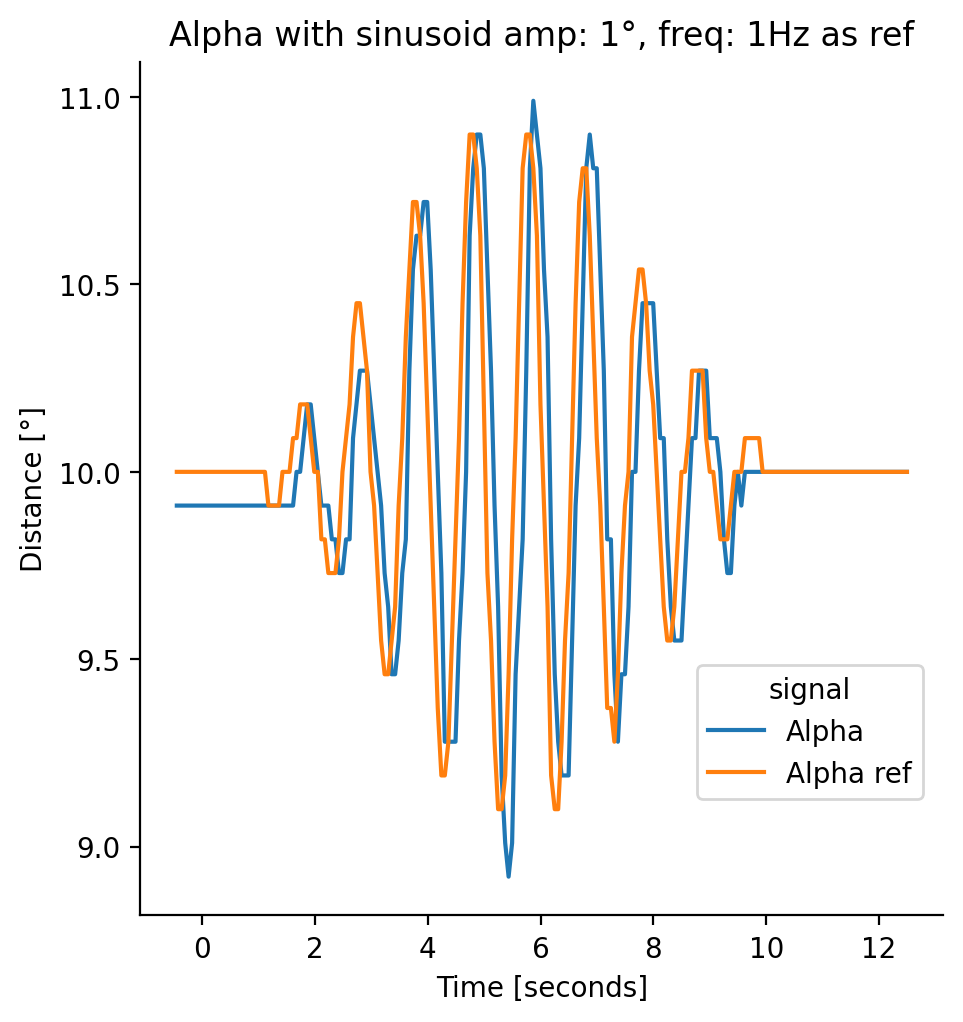

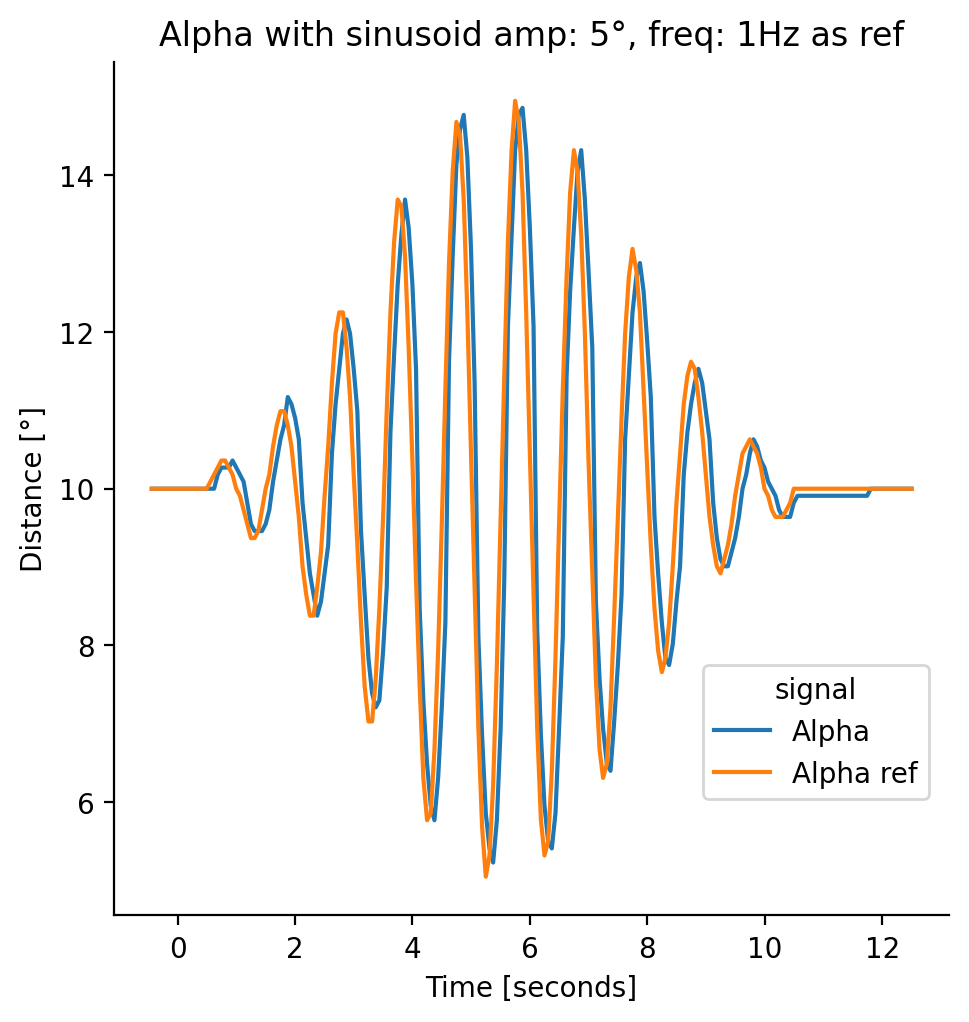

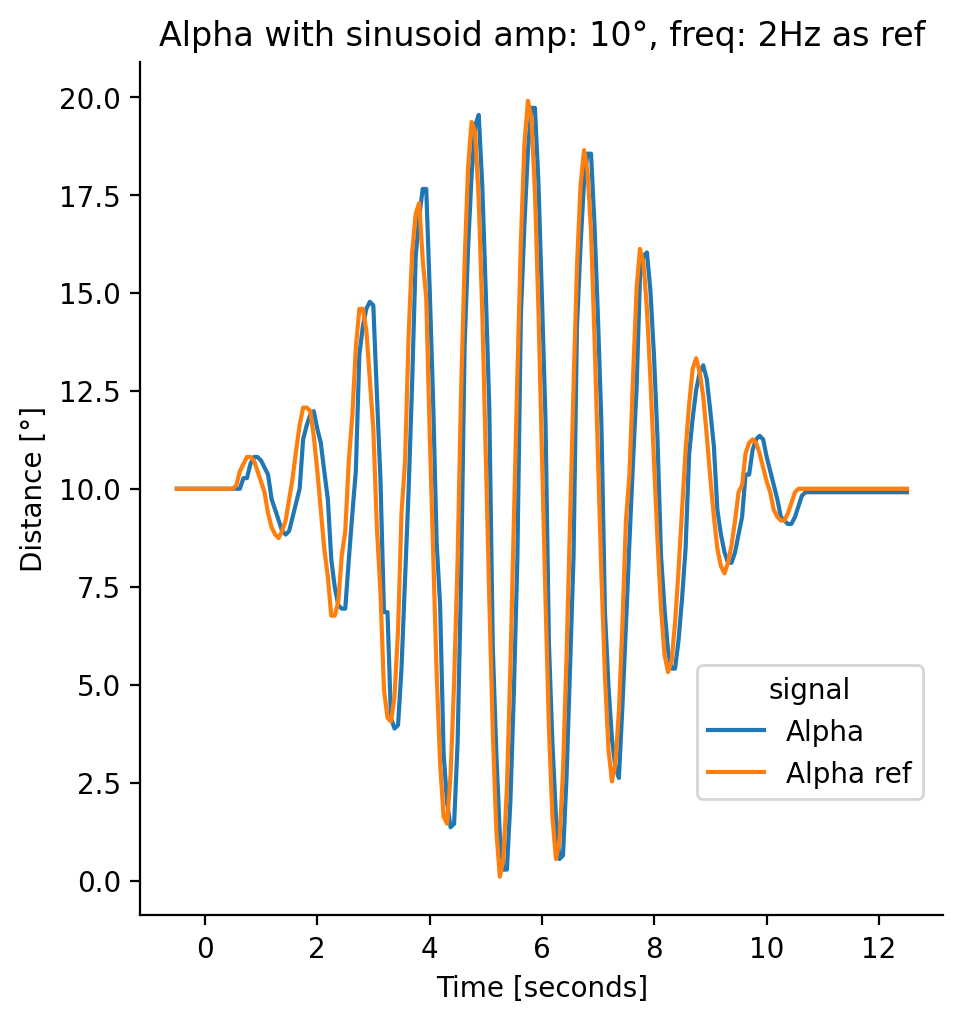

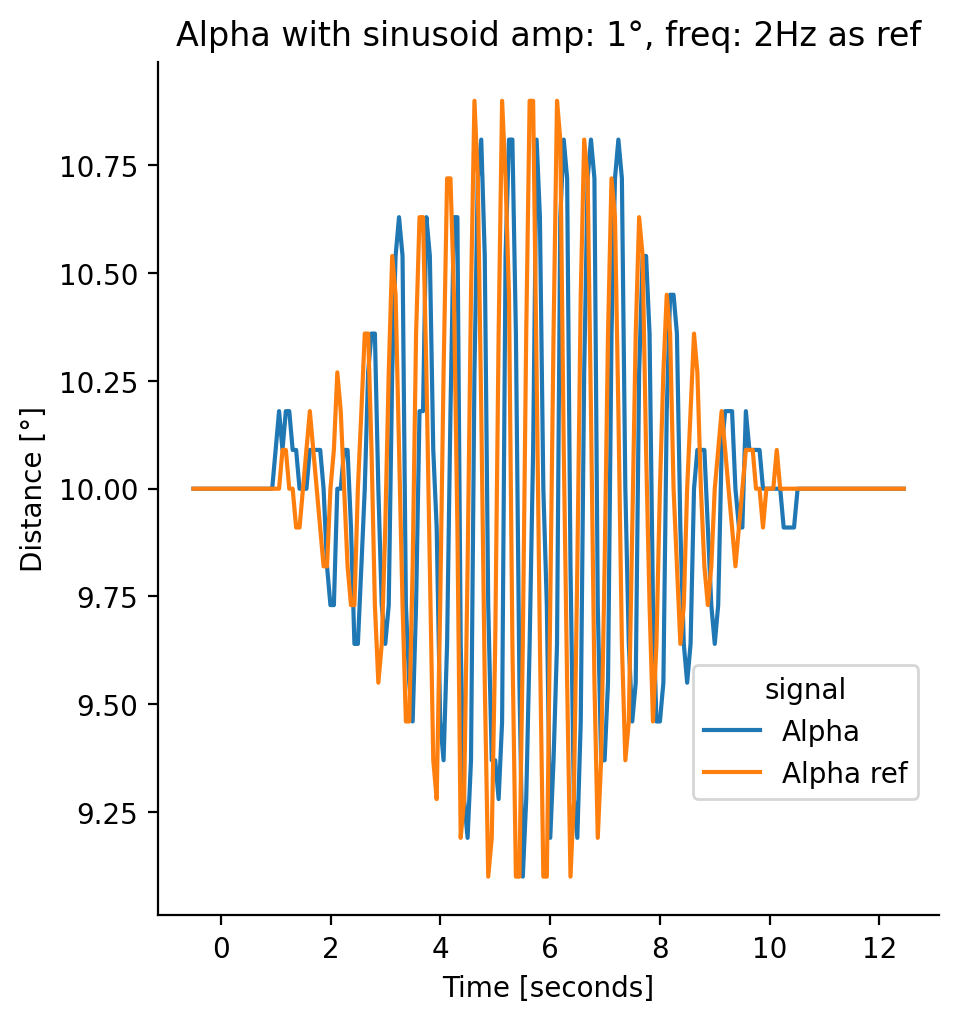

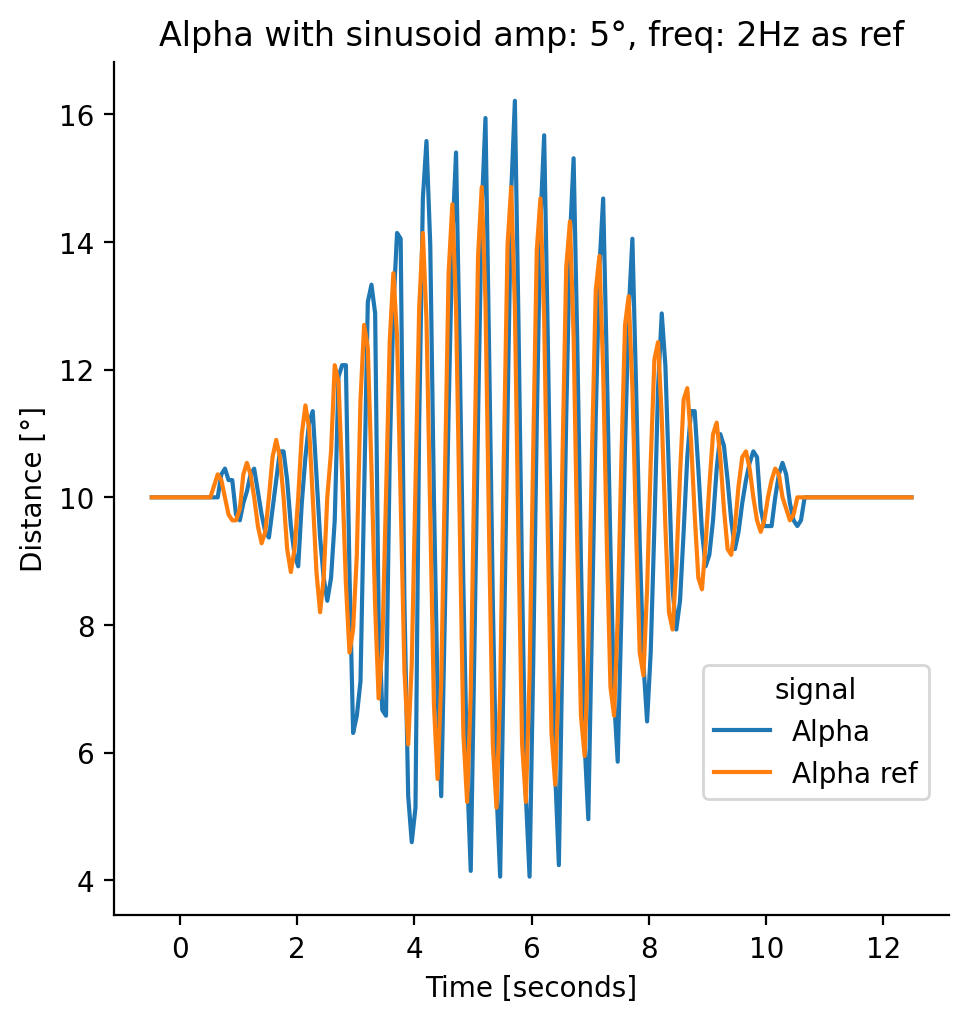

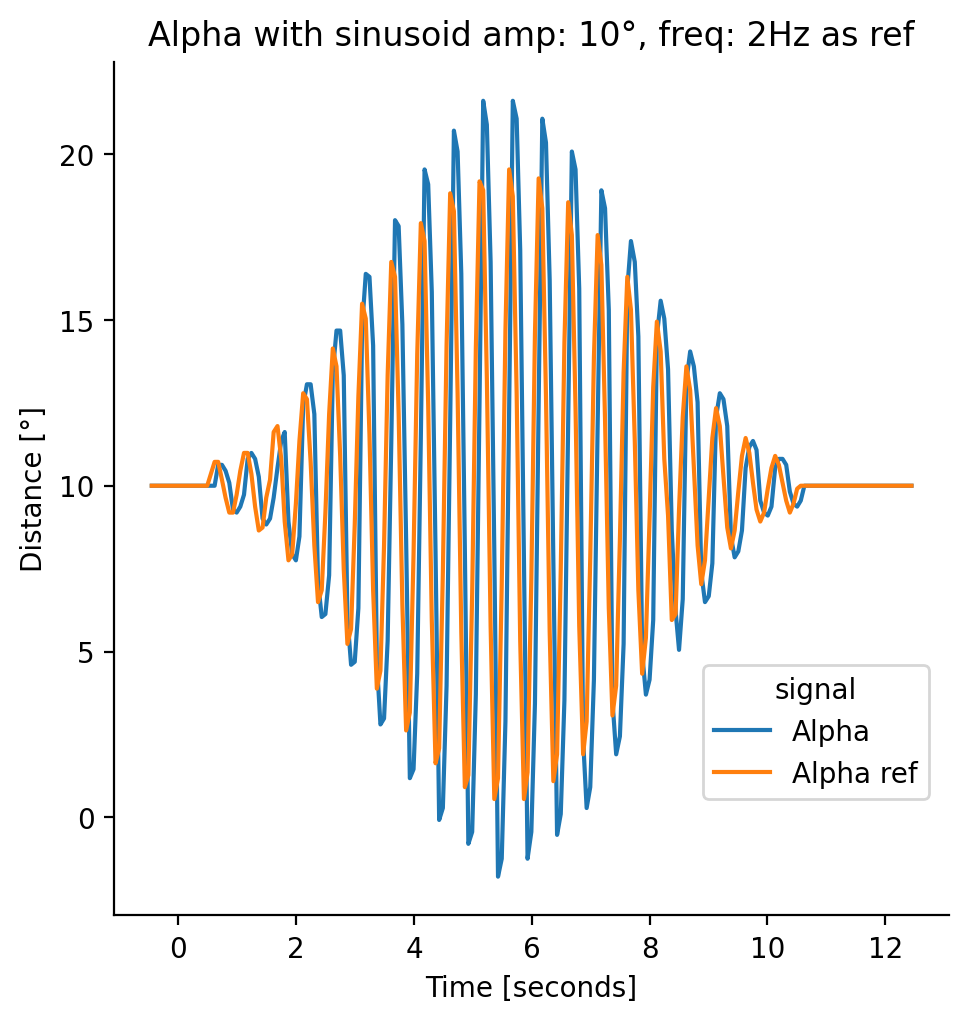

In [157]:
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data3['step_shifted_time'] = new_data3['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data3.loc[((new_data3['signal'] == 'Alpha') | (new_data3['signal'] == 'Alpha ref')) & (new_data3['times'] > ti) & (new_data3['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

    amps = [1, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'Alpha with sinusoid amp: {amps[i%3]}°, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Distance [°]')
    plt.savefig(f'alpha_sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

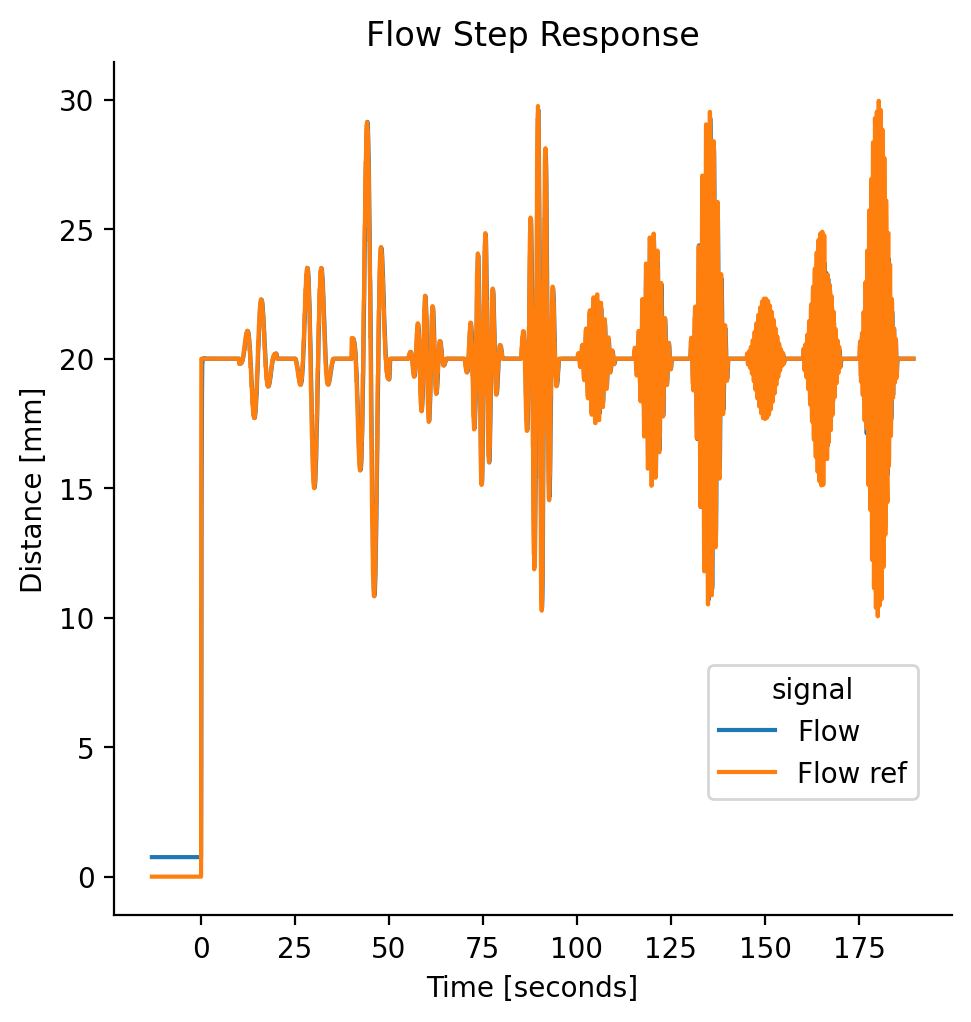

In [163]:
new_data4['Time'] = new_data4['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data4.loc[(new_data4['signal'] == 'Flow') | (new_data4['signal'] == 'Flow ref')], kind="line", x='Time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Flow Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.show()

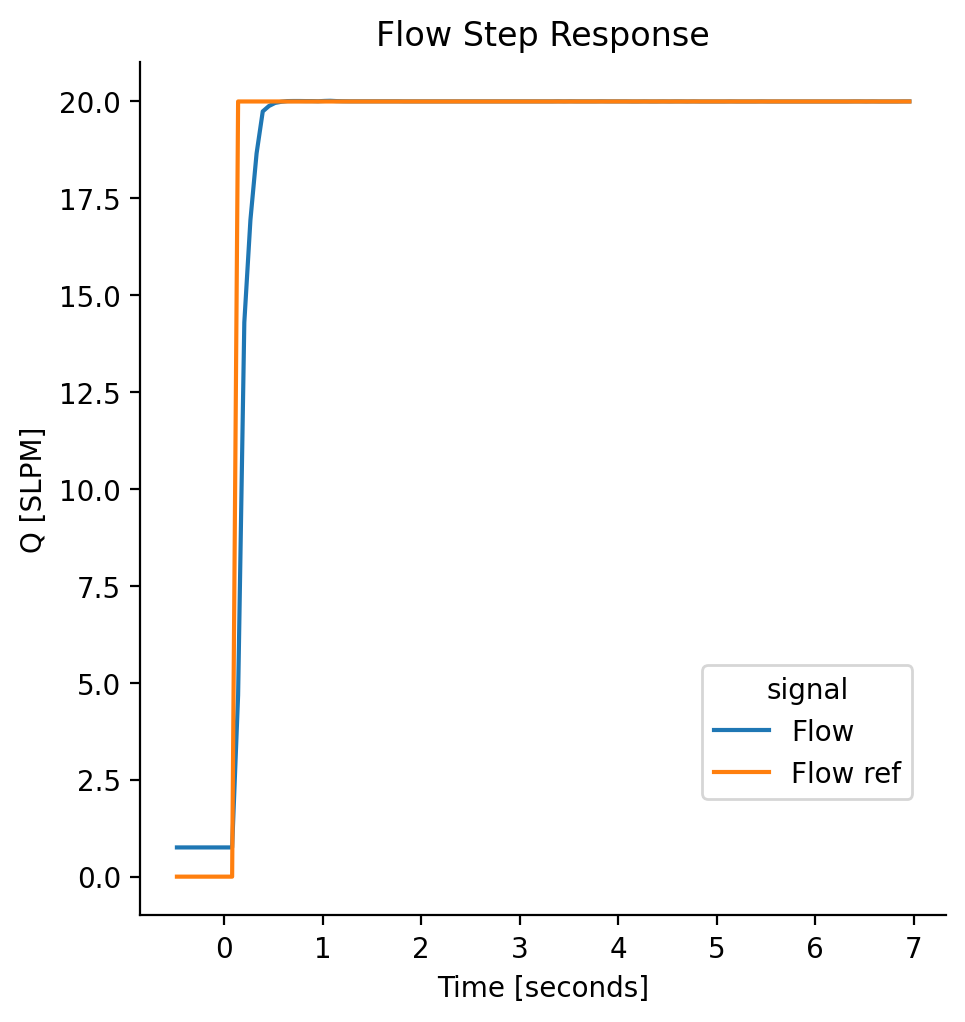

In [171]:
new_data4['step_shifted_time'] = new_data4['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
d = new_data4.loc[((new_data4['signal'] == 'Flow') | (new_data4['signal'] == 'Flow ref')) & (new_data4['times'] > 12.5) & (new_data4['times'] < 20)]
d2 = data4.loc[(data4['times'] > 12.5) & (data4['times'] < 20)]
p = sns.relplot(data=d, kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Flow Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Q [SLPM]')
plt.savefig('flow_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

In [174]:
df_selected = d2[['col1', 'col3']]

KeyError: ('times', 'x')

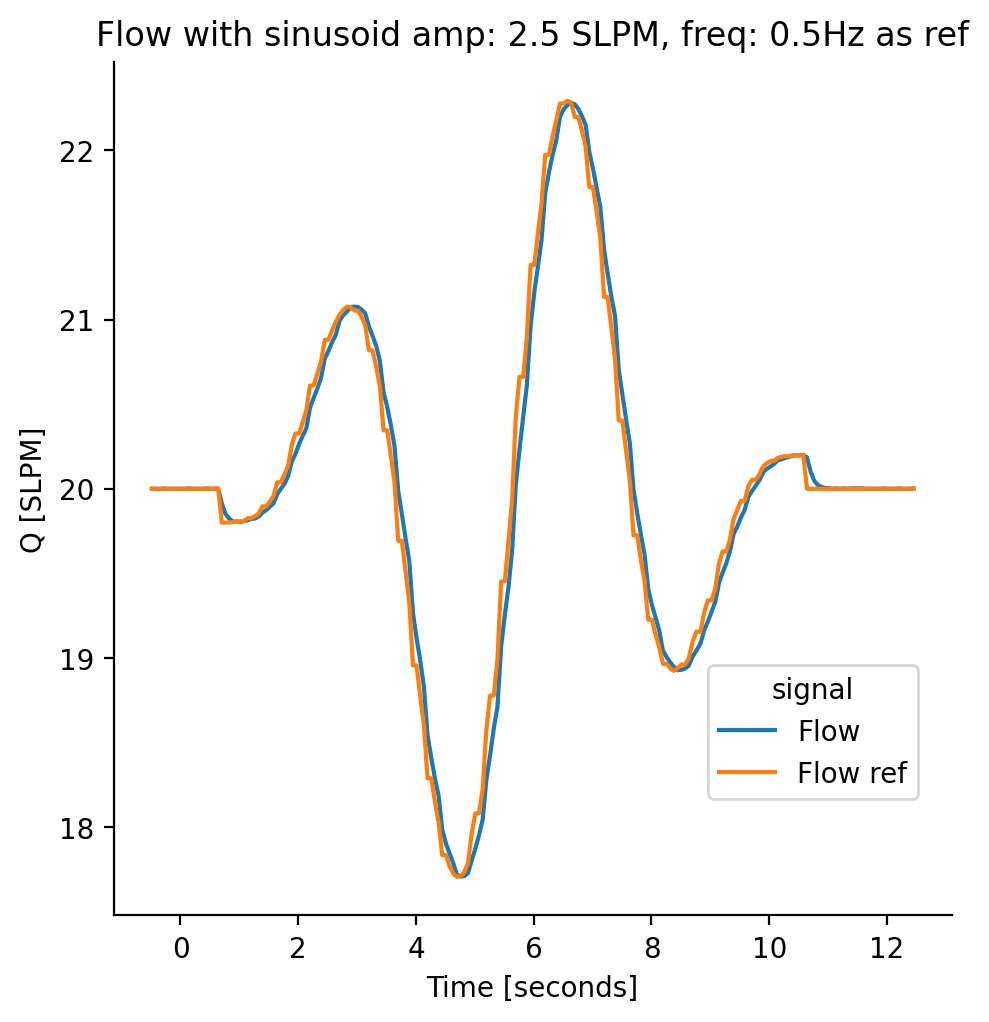

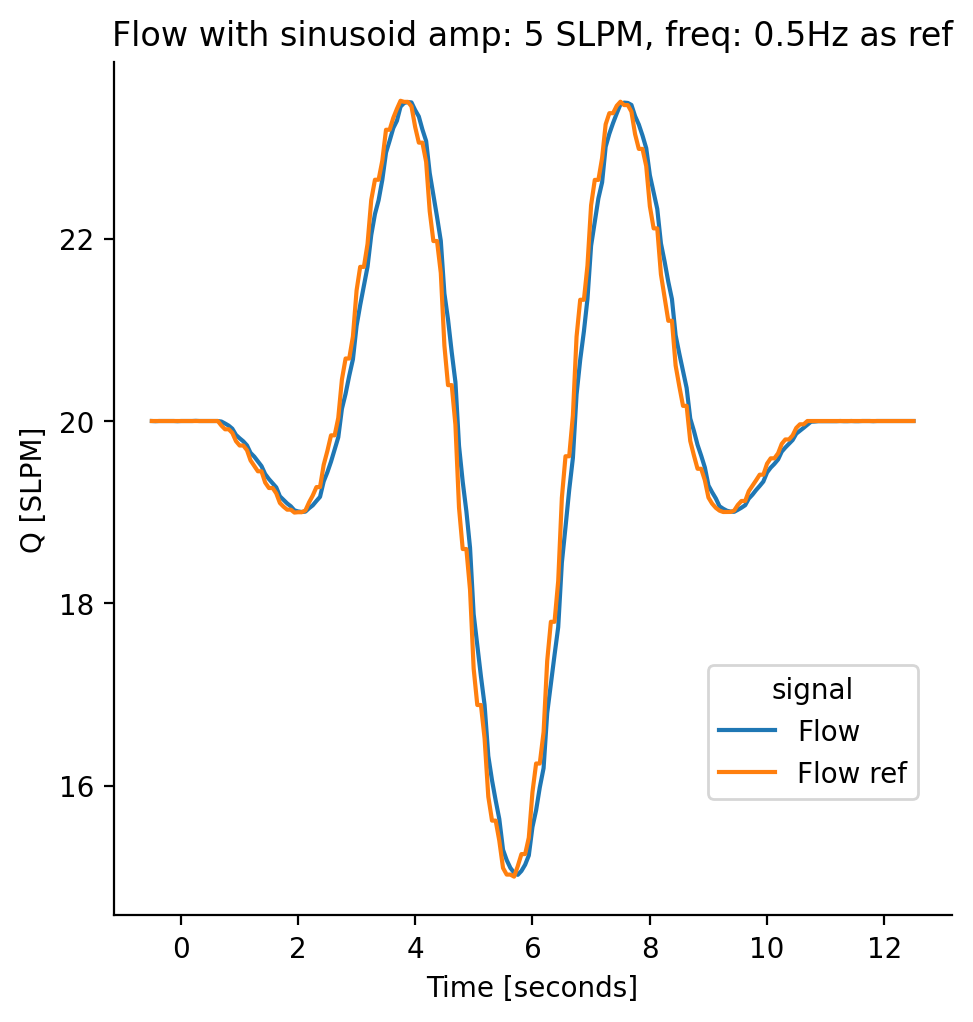

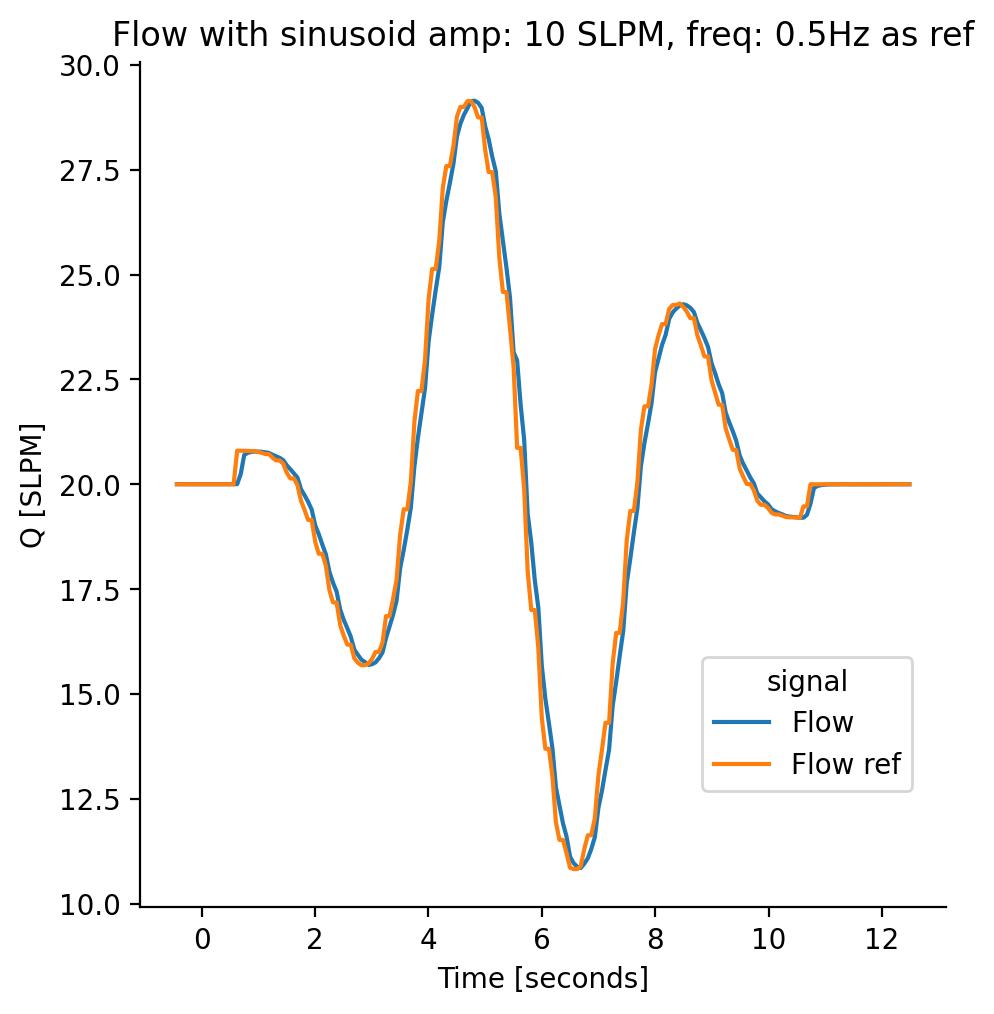

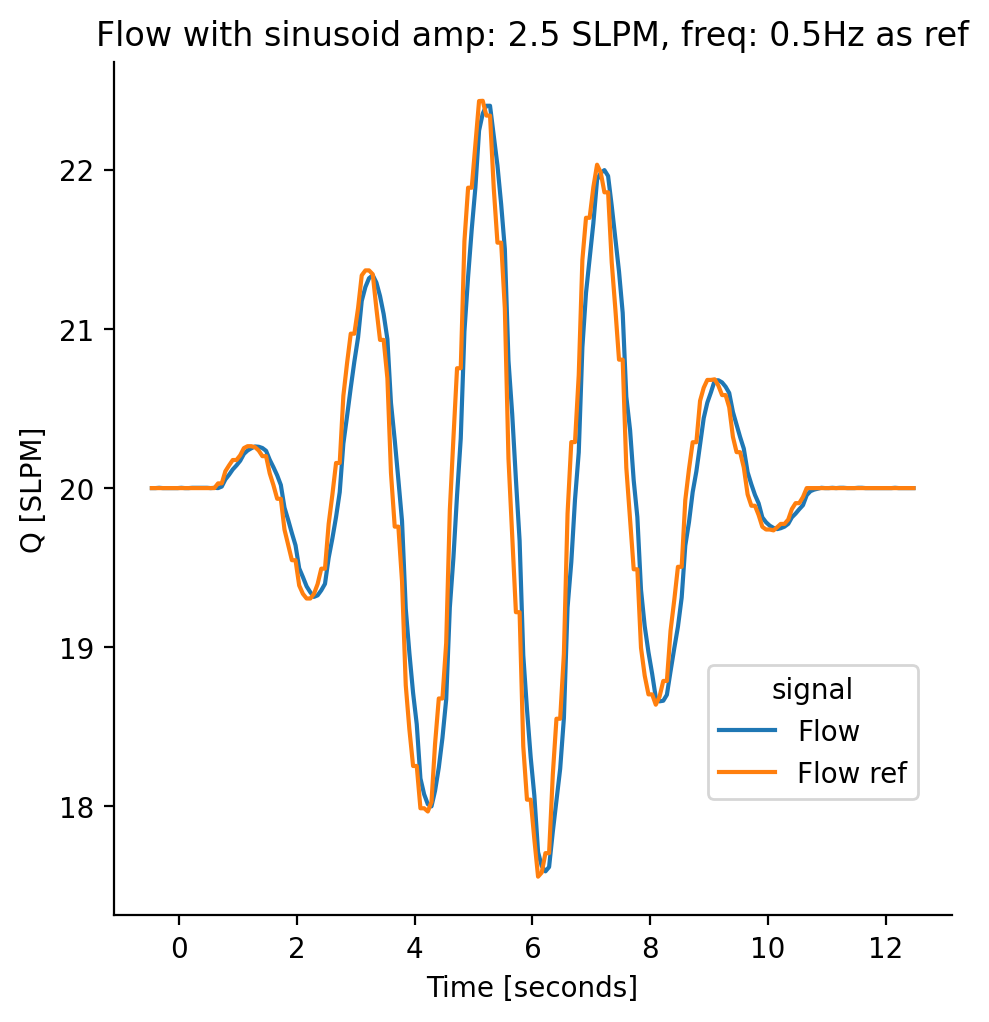

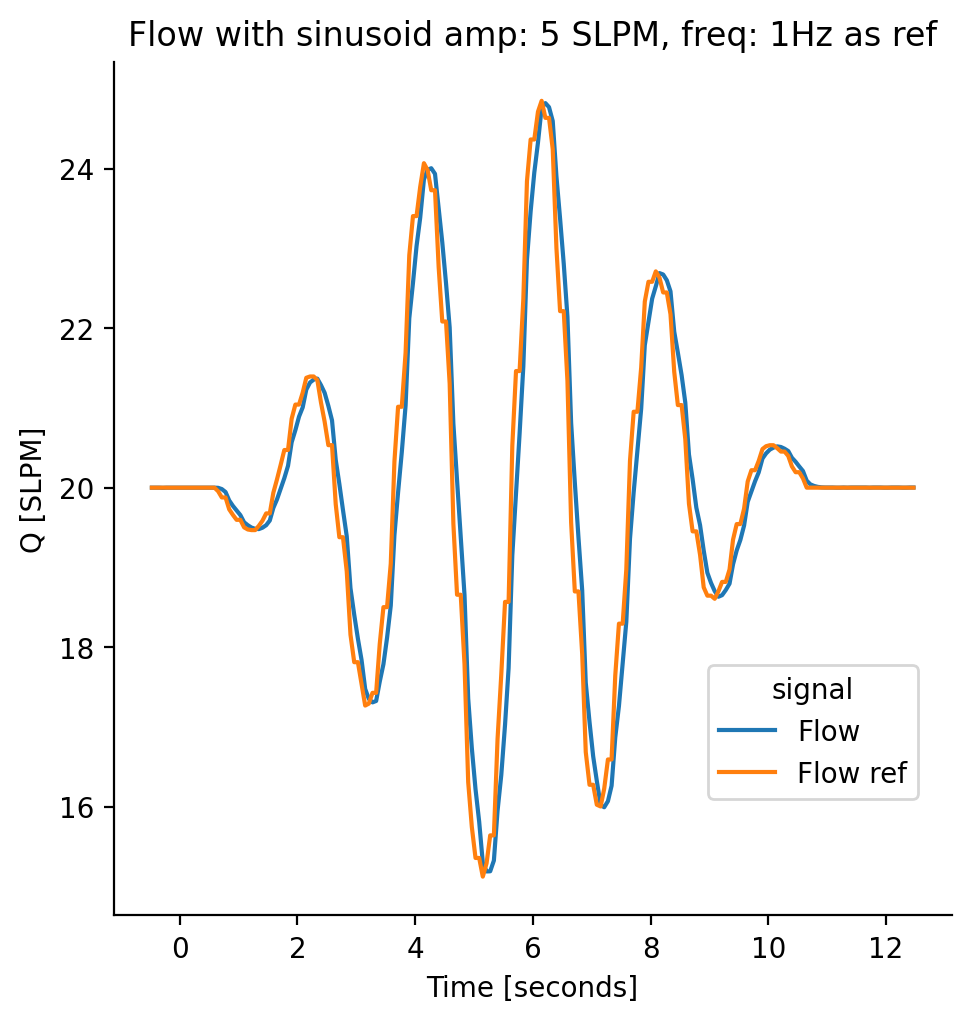

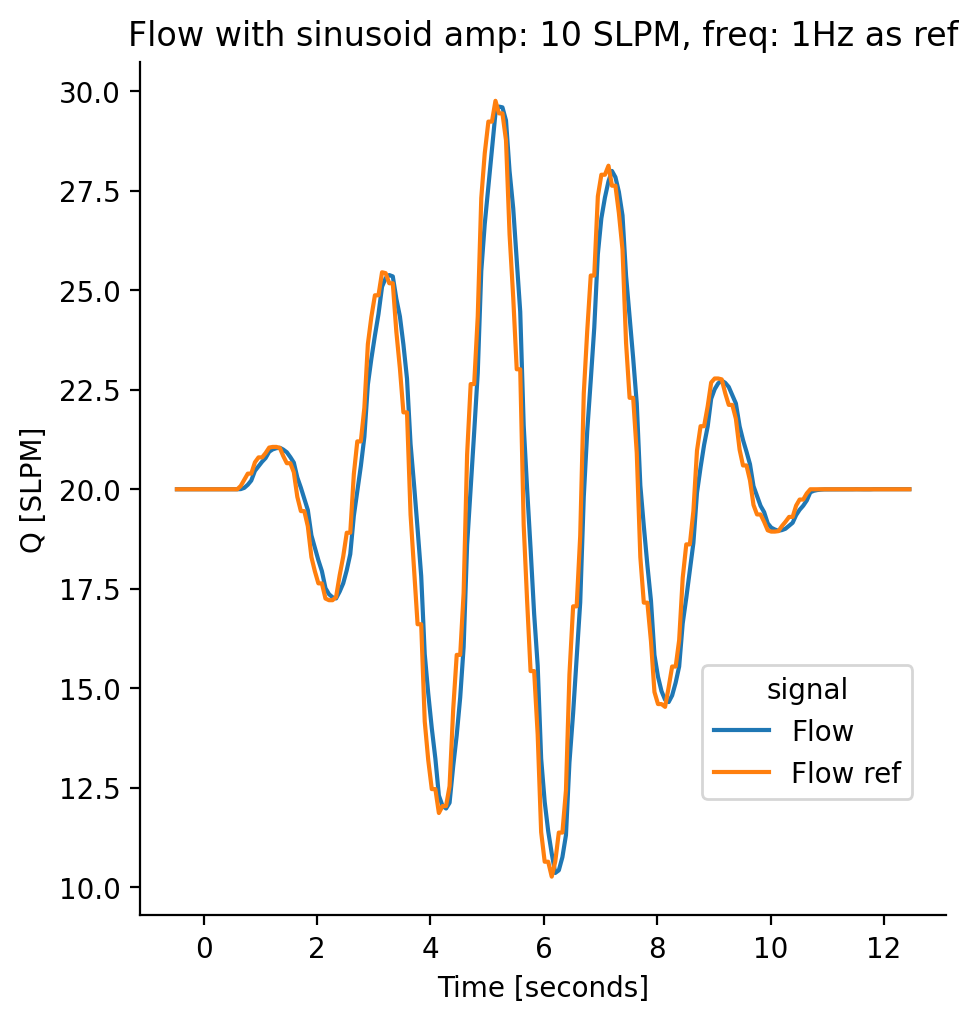

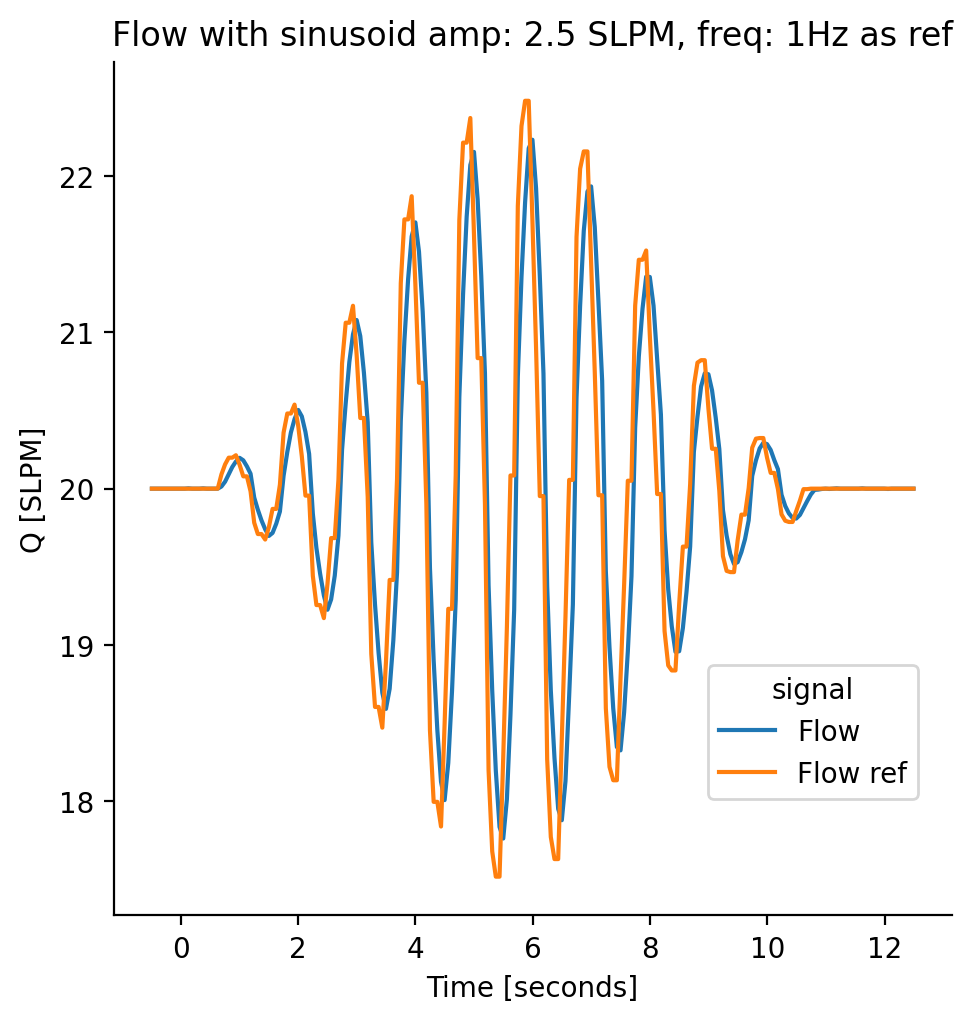

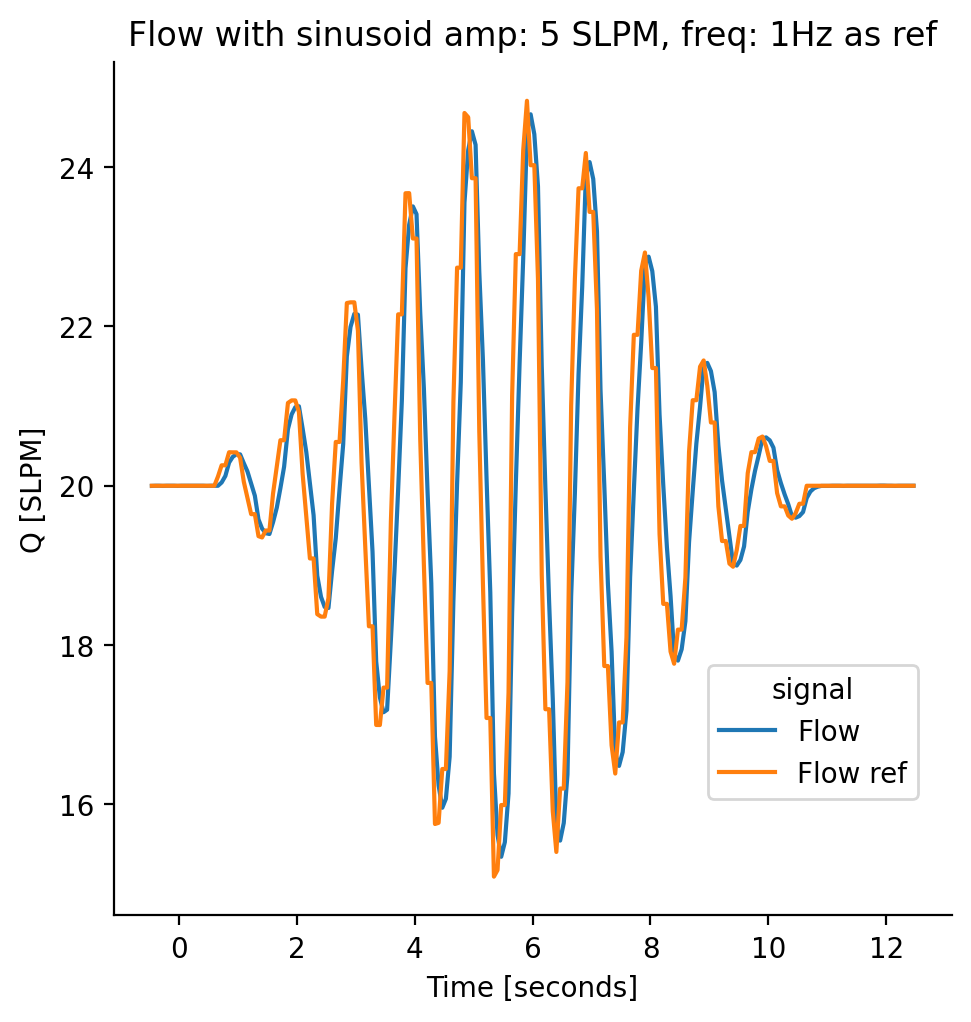

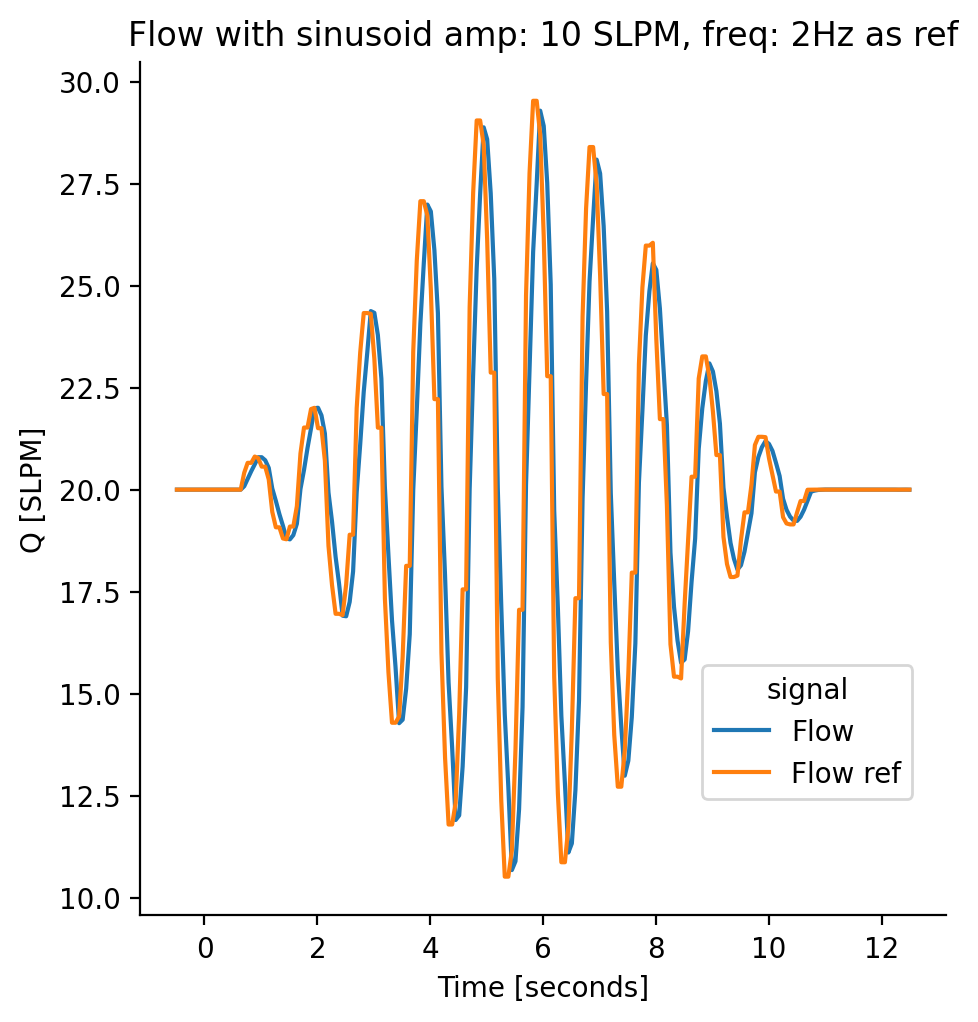

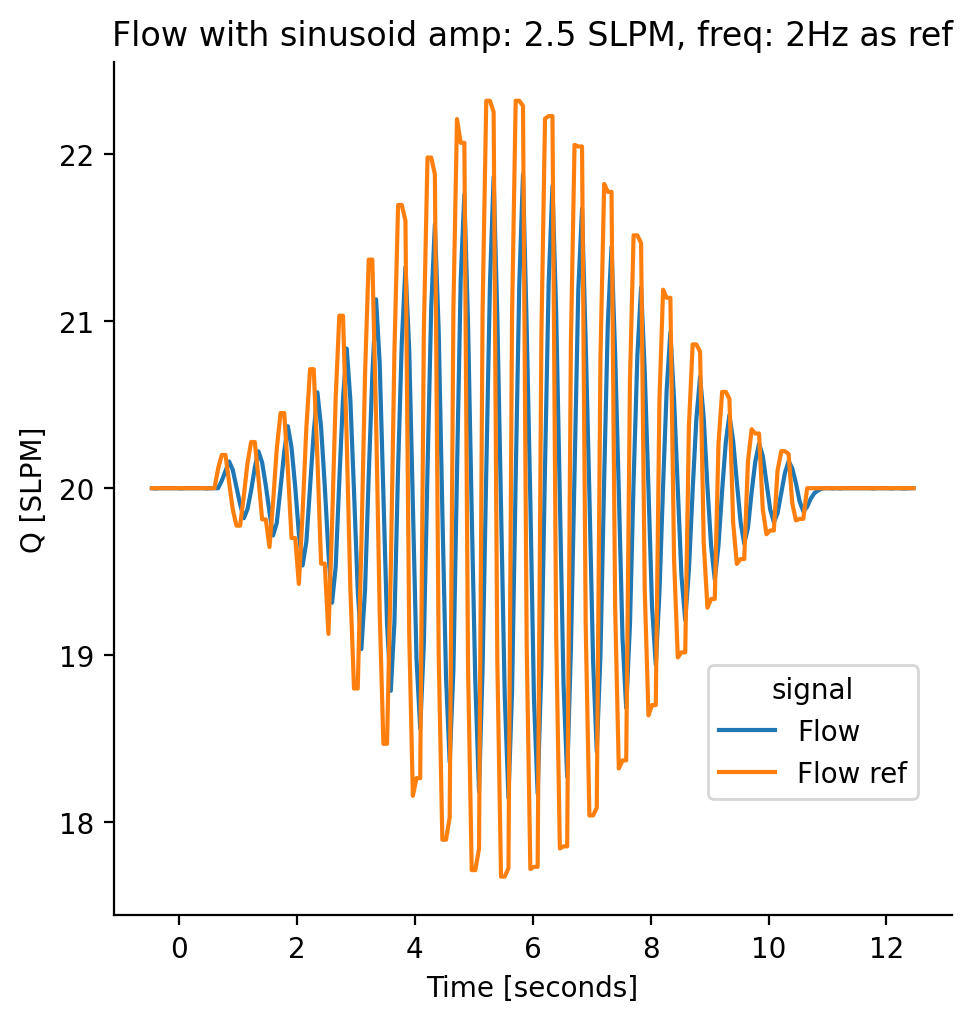

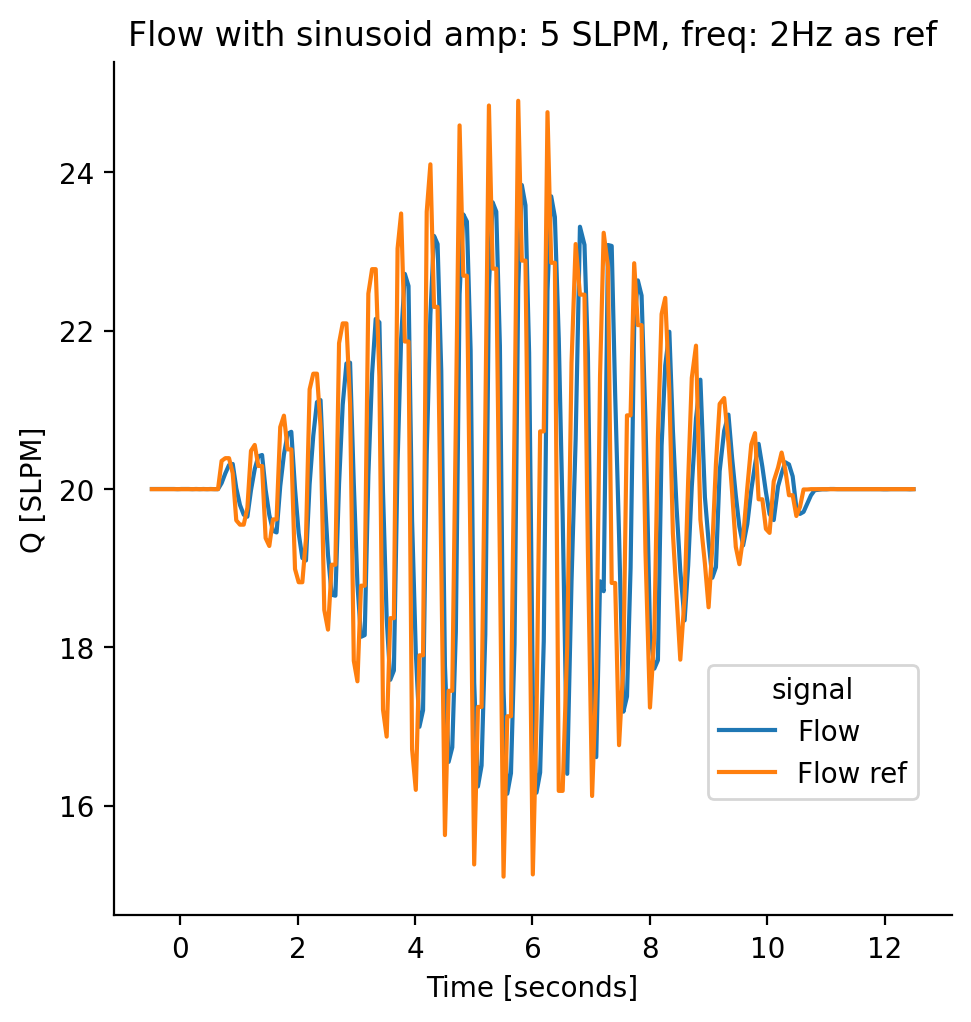

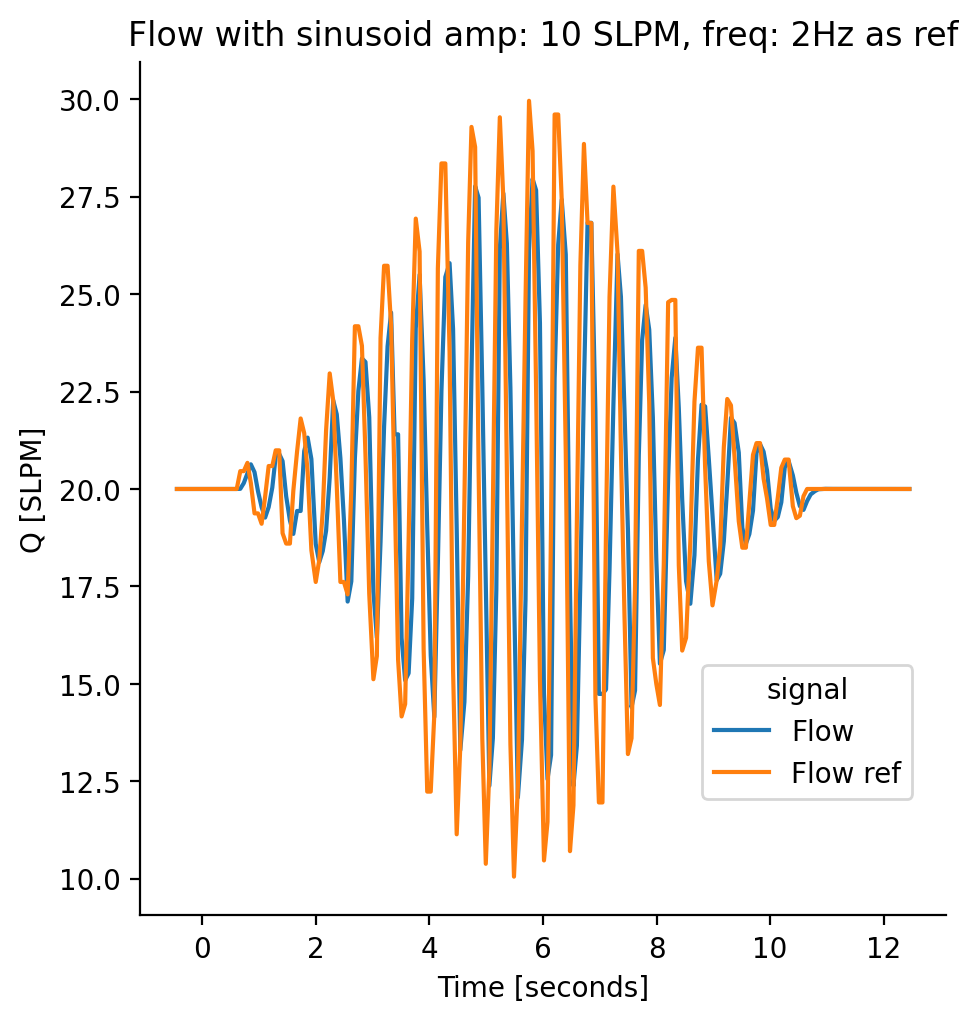

In [168]:
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data4['step_shifted_time'] = new_data4['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data4.loc[((new_data4['signal'] == 'Flow') | (new_data4['signal'] == 'Flow ref')) & (new_data4['times'] > ti) & (new_data4['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

    amps = [2.5, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'Flow with sinusoid amp: {amps[i%3]} SLPM, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Q [SLPM]')
    plt.savefig(f'flow_sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()